<center>
 <h1 align="center">  Web Scraping Project- IMDB Movie </h1>
</center>


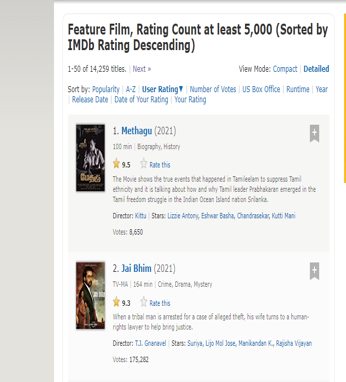

> In this notebook we will scarpe data from  IMDb website using Selenium

> Perform some EDA based on the data collected

In [4]:
!pip install selenium 

In [1]:
#Importimg libraries for webscrapping

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC #wait with expected condtion
from selenium.webdriver.common.by import By
import requests # Website connections
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
import pandas as pd # For converting results to a dataframe and bar chart plots
import json # For parsing json
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
py.init_notebook_mode(connected=True)
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [2]:
#Running Chrome driver.exe. 

driver = webdriver.Chrome('/*/Webscrapping/Selenium/chromedriver_win32/chromedriver.exe') 

C:\Users\vijay\AppData\Local\Temp/ipykernel_20284/1198115769.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/vijay/OneDrive/Desktop/Wecloud/Data Science Bootcamp/Python/Webscrapping/Selenium/chromedriver_win32/chromedriver.exe')


In [3]:
#IMDb website

driver.get("https://www.imdb.com/")

## Navigating through Imdb website using Selinium
- X-path to navigate



In [15]:
#click on Tab button to get the list. Using Xpath: //*[@id="imdbHeader-navDrawerOpen--desktop"]

driver.find_element_by_xpath('//*[@id="imdbHeader-navDrawerOpen--desktop"]').click()

C:\Users\vijay\AppData\Local\Temp/ipykernel_62384/1100480296.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="imdbHeader-navDrawerOpen--desktop"]').click()


In [16]:
#click Tab >> Awards>> Oscar>>Nominee

driver.find_element_by_xpath('//*[@id="imdbHeader"]/div[2]/aside/div/div[2]/div/div[3]/span/div/div/ul/a[1]').click()
driver.find_element_by_xpath('//*[@id="widget-nav"]/div[2]/div/ul/li[2]/a').click()


C:\Users\vijay\AppData\Local\Temp/ipykernel_62384/1673676793.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="imdbHeader"]/div[2]/aside/div/div[2]/div/div[3]/span/div/div/ul/a[1]').click()
C:\Users\vijay\AppData\Local\Temp/ipykernel_62384/1673676793.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="widget-nav"]/div[2]/div/ul/li[2]/a').click()


# Collecting  10000 movies of all time
- Url: https://www.imdb.com/search/title/?at=0&num_votes=5000,&sort=user_rating,desc&start=1&title_type=feature

## Navigating to the search

In [384]:
driver = webdriver.Chrome('/*/Webscrapping/Selenium/chromedriver_win32/chromedriver.exe') 

C:\Users\vijay\AppData\Local\Temp/ipykernel_8692/4067153632.py:1: DeprecationWarning:

executable_path has been deprecated, please pass in a Service object



In [335]:
#opening new browser with 10000 search result

driver.get("https://www.imdb.com/search/title/?at=0&num_votes=5000,&sort=user_rating,desc&start=1&title_type=feature")

## 1. Collecting Data

- Collect the data into a list
- Create dataframe
- Transfer data into csv


 ### Collect data from first page

In [336]:
MovieData= driver.find_elements_by_class_name('lister-item-content')

C:\Users\vijay\AppData\Local\Temp/ipykernel_8692/1883704321.py:1: DeprecationWarning:

find_elements_by_* commands are deprecated. Please use find_elements() instead



In [337]:
MovieData

[<selenium.webdriver.remote.webelement.WebElement (session="0bd91a96c3c404609ed5c30a82ca28ea", element="2a700aa8-a8b9-41eb-9b3f-e2b0da066a31")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0bd91a96c3c404609ed5c30a82ca28ea", element="18facdea-1884-4c56-94ca-20e98d965acb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0bd91a96c3c404609ed5c30a82ca28ea", element="ffb4825f-f4cb-41e3-9456-43b829ee7ba3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0bd91a96c3c404609ed5c30a82ca28ea", element="616fd742-19a7-47aa-9160-ae0c5309c363")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0bd91a96c3c404609ed5c30a82ca28ea", element="470fd053-913d-498f-8935-fca9884b5c39")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0bd91a96c3c404609ed5c30a82ca28ea", element="a5ff7479-d6ea-48ca-8b0d-dc05fc39af87")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0bd91a96c3c404609ed5c30a82ca28ea", element="8014d77a-ba0b-4434-b822-4d

##### Collecting data into a List

In [362]:
# declaring iterables variable for xpath
#Collecting data from first page
MovieDetails=[]
directorI=1
actorsI=1
votesI=1
GrossI=1

for tag in MovieData:
    try:
        Moviename=tag.find_elements_by_tag_name('h3')[0].find_elements_by_tag_name('a')[0].text
    except:
        Moviename='error'
    try:
        Year = tag.find_elements_by_tag_name('h3')[0].find_elements_by_class_name('lister-item-year')[0].text[1:5]
    except:
        Year ='error'
    try:
        Runtime = tag.find_elements_by_tag_name('p')[0].find_elements_by_class_name('runtime')[0].text
    except:
        Runtime ='error'
    try:
        Genre = tag.find_elements_by_tag_name('p')[0].find_elements_by_class_name('genre')[0].text
    except:
        Genre ='error'
    try:
        Rating = tag.find_elements_by_tag_name('div')[0].find_elements_by_tag_name('strong')[0].text
    except:
        Rating ='error'
    try:
        MPAA_Rating = tag.find_elements_by_tag_name('p')[0].find_elements_by_class_name('certificate')[0].text
    except:
        MPAA_Rating ='error' #N/A is not applicable
    
    try:
        xpath= f'//*[@id="main"]/div/div[3]/div/div[{directorI}]/div[3]/p[3]/a[1]'
        Director = tag.find_element_by_xpath(xpath).text
        directorI+=1
    except:
        Director ='error'
    try:
        xpath= f'//*[@id="main"]/div/div[3]/div/div[{actorsI}]/div[3]/p[3]'
        Actors=tag.find_element_by_xpath(xpath).text.split('|')[1][7:].strip()
        actorsI+=1
    except:
        Actors ='error'
    try:
        xpath= f'//*[@id="main"]/div/div[3]/div/div[{votesI}]/div[3]/p[4]/span[2]'
        Votes=tag.find_element_by_xpath(xpath).text
        votesI+=1
    except:
        Votes='error'
    try:
        #//*[@id="main"]/div/div[3]/div/div[5]/div[3]/p[4]/span[5]
        xpath= f'//*[@id="main"]/div/div[3]/div/div[{GrossI}]/div[3]/p[4]/span[5]'
        Gross=tag.find_element_by_xpath(xpath).text
        #print(Gross)    
    except:
        Gross='error'
    GrossI+=1
    
    #storing the above variables in list MovieDetails
    MovieDetails.append([Moviename,Year,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross])
        
        
        

$28.34M
$134.97M
$534.86M
$57.30M
$4.36M
$377.85M
$107.93M
$96.90M
$292.58M
$37.03M
$315.54M
$330.25M
$6.10M


In [363]:
len(MovieDetails)

49

In [366]:
MovieDetails[3]

['The Shawshank Redemption',
 '1994',
 '142 min',
 'Drama',
 '9.3',
 'R',
 'Frank Darabont',
 'Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
 '2,548,959',
 '$28.34M']

In [367]:
# Creating dataFrame from list MovieDetails

MovieDataFrame= pd.DataFrame(MovieDetails, columns=['Moviename','Year','Runtime','Genre','Rating','MPAA_Rating','Director','Actors','Votes','Gross'])

In [368]:
len(MovieDataFrame)

49

In [369]:
#Creating temporary dataframe TempfirstPageData for backup

TempfirstPageData=MovieDataFrame.copy()

In [370]:
MovieDataFrame.head(10)

,Moviename,Year,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross
0,Methagu,2021,100 min,"Biography, History",9.5,error,Kittu,"Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...","8,650",error
1,Jai Bhim,2021,164 min,"Crime, Drama, Mystery",9.3,TV-MA,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha ...","175,282",error
2,The Chaos Class,1975,87 min,"Comedy, Drama",9.3,error,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","39,749",error
3,The Shawshank Redemption,1994,142 min,Drama,9.3,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","2,548,959",$28.34M
4,The Godfather,1972,175 min,"Crime, Drama",9.2,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","1,753,202",$134.97M
5,Mirror Game,2016,147 min,"Crime, Mystery, Thriller",9.1,error,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Part...","25,624",error
6,Soorarai Pottru,2020,153 min,Drama,9.1,TV-MA,Sudha Kongara,"Suriya, Paresh Rawal, Mohan Babu, Gaurav Pareek","107,596",error
7,Aloko Udapadi,2017,113 min,"Drama, History",9.0,error,Chathra Weeraman,"Uddika Premarathna, Dilhani Ekanayake, Roshan ...","6,760",error
8,#Home,2021,158 min,Drama,9.0,error,Rojin Thomas,"Indrans, Sreenath Bhasi, Manju Pillai, Naslen","11,829",error
9,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","2,499,388",$534.86M


### Collecting data from the remaining pages

- Creating a function to pass through all the pages. 
- For project purpose collecting 10000 data, so looping through first 200 pages. Every page has 50 movie details
- Collecting data from each page

In [385]:
driver.get("https://www.imdb.com/search/title/?at=0&num_votes=5000,&sort=user_rating,desc&start=1&title_type=feature")

In [386]:
# list: Nextpage to collect data from all the remaining pages
Nextpage=[]

In [387]:
len(Nextpage)

0

In [ ]:
# page 1 xpath//*[@id="main"]/div/div[4]/a
# page 2 onwards:: //*[@id="main"]/div/div[4]/a[2]

#### Defining the function inputMovieData()
- This functions scrolls through each page
- Goes to the next page
- Collects movie data from every page

In [388]:
def inputMovieData(Netxpage,page):
    #scroll to the end of existing page
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    if page==1:
        #click on NextPage link on each page
        driver.find_element_by_xpath('//*[@id="main"]/div/div[4]/a').click()
        #collect details from the page
        MovieData= driver.find_elements_by_class_name('lister-item-content')
        print('page1') #for tracking if the code breaks
    else:
        #click on NextPage link on each page
        driver.find_element_by_xpath('//*[@id="main"]/div/div[4]/a[2]').click()
        #collect details from the page
        MovieData= driver.find_elements_by_class_name('lister-item-content')
        print(page)
    
    ## declaring iterables variable for xpath
    directorI=1
    actorsI=1
    votesI=1
    GrossI=1
    
    #Iterating through MovieData to collect Director,Year,Runtime,Genre, Rating,Director,Actors,Votes,Gross
    for tag in MovieData:
        try:
            Moviename=tag.find_elements_by_tag_name('h3')[0].find_elements_by_tag_name('a')[0].text
        except:
            Moviename='error'
        try:
            Year = tag.find_elements_by_tag_name('h3')[0].find_elements_by_class_name('lister-item-year')[0].text
        except:
            Year ='error'
        try:
            Runtime = tag.find_elements_by_tag_name('p')[0].find_elements_by_class_name('runtime')[0].text
        except:
            Runtime ='error'
        try:
            Genre = tag.find_elements_by_tag_name('p')[0].find_elements_by_class_name('genre')[0].text
        except:
            Genre ='error'
        try:
            Rating = tag.find_elements_by_tag_name('div')[0].find_elements_by_tag_name('strong')[0].text
        except:
            Rating ='error'
        try:
            MPAA_Rating = tag.find_elements_by_tag_name('p')[0].find_elements_by_class_name('certificate')[0].text
        except:
            MPAA_Rating ='N/A' #N/A is not applicable
        try:
            xpath= f'//*[@id="main"]/div/div[3]/div/div[{directorI}]/div[3]/p[3]/a[1]'
            Director = tag.find_element_by_xpath(xpath).text
            directorI+=1
        except:
            Director ='error'
        try:
            xpath= f'//*[@id="main"]/div/div[3]/div/div[{actorsI}]/div[3]/p[3]'
            Actors=tag.find_element_by_xpath(xpath).text.split('|')[1][7:].strip()
            actorsI+=1
        except:
            Actors ='error'
        try:
            xpath= f'//*[@id="main"]/div/div[3]/div/div[{votesI}]/div[3]/p[4]/span[2]'
            Votes=tag.find_element_by_xpath(xpath).text
            votesI+=1
        except:
            Votes='error'
        try:
            #//*[@id="main"]/div/div[3]/div/div[5]/div[3]/p[4]/span[5]
            xpath= f'//*[@id="main"]/div/div[3]/div/div[{GrossI}]/div[3]/p[4]/span[5]'
            Gross=tag.find_element_by_xpath(xpath).text
            #print(Gross)    
        except:
            Gross='error'
        GrossI+=1
    
        #storing the above variables in list Nextpage
        Nextpage.append([Moviename,Year,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross])
        
    
    return(Nextpage)
        

#### For loop  to call the function inputMovieData().

In [389]:
# The below for loop is to iterate through 200 pages
#page 1 data is collected in Moviedata so we would start collecting data from page2 into list Nextpage

for page in range(1,201):
    Nextpage =inputMovieData(Nextpage,page)


C:\Users\vijay\AppData\Local\Temp/ipykernel_8692/3590948489.py:6: DeprecationWarning:

find_element_by_* commands are deprecated. Please use find_element() instead

C:\Users\vijay\AppData\Local\Temp/ipykernel_8692/3590948489.py:8: DeprecationWarning:

find_elements_by_* commands are deprecated. Please use find_elements() instead



page1


C:\Users\vijay\AppData\Local\Temp/ipykernel_8692/3590948489.py:12: DeprecationWarning:

find_element_by_* commands are deprecated. Please use find_element() instead

C:\Users\vijay\AppData\Local\Temp/ipykernel_8692/3590948489.py:14: DeprecationWarning:

find_elements_by_* commands are deprecated. Please use find_elements() instead



2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [391]:
len(Nextpage)

10000

In [397]:
Nextpage[13]

['The Lord of the Rings: The Two Towers',
 '(2002)',
 '179 min',
 'Action, Adventure, Drama',
 '8.7',
 'PG',
 'Peter Jackson',
 'Elijah Wood, Ian McKellen, Viggo Mortensen, Orlando Bloom',
 '1,587,360',
 '$342.55M']

In [392]:
TestNextpage= Nextpage.copy()

In [393]:
len(TestNextpage)

10000

### Adding the additional data collected to the MovieDataframe


In [398]:
MovieDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Moviename    49 non-null     object
 1   Year         49 non-null     object
 2   Runtime      49 non-null     object
 3   Genre        49 non-null     object
 4   Rating       49 non-null     object
 5   MPAA_Rating  49 non-null     object
 6   Director     49 non-null     object
 7   Actors       49 non-null     object
 8   Votes        49 non-null     object
 9   Gross        49 non-null     object
dtypes: object(10)
memory usage: 4.0+ KB


##### Appending Nextpage list to MovieDataFrame
- Testing if the data looks good
- Appending data to MovieDataframe


In [50]:
#Temporary file
TempfirstPageData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Moviename  10049 non-null  object
 1   Year       10049 non-null  object
 2   Runtime    10049 non-null  object
 3   Genre      10049 non-null  object
 4   Rating     10049 non-null  object
 5   Director   10049 non-null  object
 6   Actors     10049 non-null  object
 7   Votes      10049 non-null  object
dtypes: object(8)
memory usage: 628.2+ KB


In [81]:
Nextpage

[['Dara of Jasenovac',
  '(2020)',
  '130 min',
  'Drama, War',
  '8.7',
  'Predrag Antonijevic',
  'Biljana Cekic, Zlatan Vidovic, Anja Stanic, Luka Saranovic',
  '80,371'],
 ['Shershaah',
  '(2021)',
  '135 min',
  'Action, Biography, Drama',
  '8.7',
  'Vishnuvardhan',
  'Sidharth Malhotra, Kiara Advani, Shiv Panditt, Pranay Pachauri',
  '113,183'],
 ['Sardar Udham',
  '(2021)',
  '164 min',
  'Biography, Crime, Drama',
  '8.7',
  'Shoojit Sircar',
  'Vicky Kaushal, Shaun Scott, Stephen Hogan, Amol Parashar',
  '36,241'],
 ['Happy Days',
  '(1978)',
  '92 min',
  'Comedy, Drama, Family',
  '8.7',
  'Orhan Aksoy',
  'Münir Özkul, Adile Nasit, Sener Sen, Aysen Gruda',
  '10,927'],
 ['Anbe Sivam',
  '(2003)',
  '160 min',
  'Adventure, Comedy, Drama',
  '8.7',
  'Sundar C.',
  'Kamal Haasan, Madhavan, Kiran Rathod, Nassar',
  '20,147'],
 ['Devasuram',
  '(1993)',
  '187 min',
  'Action, Drama, Thriller',
  '8.7',
  'I.V. Sasi',
  'Mohanlal, Revathi, Nedumudi Venu, Innocent',
  '5,568']

In [402]:
len(MovieDataFrame)

10049

In [400]:
MovieDataFrame.loc[0]

Moviename                                                Methagu
Year                                                        2021
Runtime                                                  100 min
Genre                                         Biography, History
Rating                                                       9.5
MPAA_Rating                                                error
Director                                                   Kittu
Actors         Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...
Votes                                                      8,650
Gross                                                      error
Name: 0, dtype: object

In [401]:
MovieDataFrame=MovieDataFrame.append(pd.DataFrame(Nextpage, columns=['Moviename','Year','Runtime','Genre','Rating','MPAA_Rating','Director','Actors','Votes','Gross']),ignore_index = True)

In [403]:
MovieDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Moviename    10049 non-null  object
 1   Year         10049 non-null  object
 2   Runtime      10049 non-null  object
 3   Genre        10049 non-null  object
 4   Rating       10049 non-null  object
 5   MPAA_Rating  10049 non-null  object
 6   Director     10049 non-null  object
 7   Actors       10049 non-null  object
 8   Votes        10049 non-null  object
 9   Gross        10049 non-null  object
dtypes: object(10)
memory usage: 785.2+ KB


In [404]:
MovieDataFrame.loc[99]

Moviename                                                     96
Year                                                 (II) (2018)
Runtime                                                  158 min
Genre                                             Drama, Romance
Rating                                                       8.5
MPAA_Rating                                            Not Rated
Director                                           C. Prem Kumar
Actors         Vijay Sethupathi, Adithya Bhaskar, Trisha Kris...
Votes                                                     27,717
Gross                                                      error
Name: 99, dtype: object

In [405]:
MovieDataFrame.describe()

,Moviename,Year,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross
count,10049,10049,10049,10049,10049,10049,10049,10049,10049,10049
unique,9741,217,182,465,34,31,4140,9952,8897,3402
top,Little Women,(2018),105 min,Drama,7.2,R,Woody Allen,error,"5,172",error
freq,4,307,249,663,622,3554,49,57,6,3583


## 2. Cleanning data - MovieDataFrame
- Year, Gross column has other characters apart from number. 
- Converting Year, Runtime, Rating, Votes,Gross column from String to numeric

In [406]:
MovieDataFrame.head(10)

,Moviename,Year,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross
0,Methagu,2021,100 min,"Biography, History",9.5,error,Kittu,"Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...","8,650",error
1,Jai Bhim,2021,164 min,"Crime, Drama, Mystery",9.3,TV-MA,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha ...","175,282",error
2,The Chaos Class,1975,87 min,"Comedy, Drama",9.3,error,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","39,749",error
3,The Shawshank Redemption,1994,142 min,Drama,9.3,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","2,548,959",$28.34M
4,The Godfather,1972,175 min,"Crime, Drama",9.2,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","1,753,202",$134.97M
5,Mirror Game,2016,147 min,"Crime, Mystery, Thriller",9.1,error,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Part...","25,624",error
6,Soorarai Pottru,2020,153 min,Drama,9.1,TV-MA,Sudha Kongara,"Suriya, Paresh Rawal, Mohan Babu, Gaurav Pareek","107,596",error
7,Aloko Udapadi,2017,113 min,"Drama, History",9.0,error,Chathra Weeraman,"Uddika Premarathna, Dilhani Ekanayake, Roshan ...","6,760",error
8,#Home,2021,158 min,Drama,9.0,error,Rojin Thomas,"Indrans, Sreenath Bhasi, Manju Pillai, Naslen","11,829",error
9,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","2,499,388",$534.86M


#### Cleaning YEAR column

In [407]:
MovieDataFrame['Year'].value_counts()

(2018)          307
(2013)          304
(2016)          301
(2014)          297
(2017)          288
               ... 
(1916)            1
(I) (1985)        1
2017              1
2008              1
(III) (2014)      1
Name: Year, Length: 217, dtype: int64

In [408]:
MovieDataFrame.isnull()

,Moviename,Year,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10044,False,False,False,False,False,False,False,False,False,False
10045,False,False,False,False,False,False,False,False,False,False
10046,False,False,False,False,False,False,False,False,False,False
10047,False,False,False,False,False,False,False,False,False,False


#####  Created a function setDate() to extract the number from Year column
##### Using Regular expression to extract the year from the string

In [409]:
import re

def setDate(year):
    return re.findall('\d\d\d\d', year)


In [410]:
# run a for loop across MovieDataFrame, calling the function setDate() for every row, column Year
#created an empty list TestDateList to store the updated date values

TestDateList=[]
for row in MovieDataFrame['Year']:
    #print(row)
    TempDate=setDate(row)[0]
    print(TempDate)
    TestDateList.append(TempDate)

2021
2021
1975
1994
1972
2016
2020
2017
2021
2008
1976
1976
1974
1957
2021
2018
2018
2016
2011
1976
1976
1989
2003
1994
1993
1984
1982
2018
2011
2010
2020
2010
1977
1989
1993
1999
2001
1994
1980
1966
1961
2011
2016
2021
1996
2009
2020
2021
2021
2020
2021
2021
1978
2003
1993
2000
1973
1977
1978
1977
1985
1998
2002
1999
1996
1992
1990
1987
1980
1975
1969
2019
2019
2019
2019
2021
2022
2014
2005
2002
1995
1977
1977
1980
2001
1988
1998
1999
1997
1995
1991
1979
1977
1962
1959
1954
1946
2019
2018
2018
2018
2016
2015
2015
2014
2011
2021
2006
2006
2004
2006
2004
2004
2003
2003
2002
1977
2002
1987
2000
1998
1997
1995
1994
1994
1991
1991
1988
1988
1985
1984
1975
1971
1968
1965
1964
1960
1960
1959
1959
1957
1954
1942
1936
1931
2019
2020
2018
2018
2019
2018
2019
1974
2017
2016
2016
2015
2018
2015
2019
2018
2014
2014
2017
2014
2012
2012
1999
2012
2020
2009
2007
2019
2007
2008
1975
2006
2003
2004
2003
2002
2002
1976
1999
2000
1986
1997
1994
1992
1991
1989
1983
1981
1980
1979
1979
1974
1971
1969
1967


1959
1959
1959
1958
1958
1957
1957
1957
1957
1957
1955
1955
1955
1954
1954
1954
1954
1953
1953
1952
1951
1951
1950
1950
1949
1949
1948
1947
1947
1947
1947
1946
1946
1945
1944
1943
1942
1942
1942
1941
1941
1940
1939
1937
1936
1934
1934
1933
1931
1923
1920
2020
2021
2019
2020
2018
2019
2019
2019
2019
2019
2018
2019
2019
2018
2019
2018
2018
2021
2017
2020
2018
2018
2017
2018
2018
2021
2019
2018
2018
2017
2017
2016
2017
2016
2017
2017
2017
2016
2016
2018
2016
2016
2016
2016
2017
2016
2018
2015
2018
2016
2016
2017
2015
2016
2015
2015
2016
2015
2015
2018
2015
2015
2015
2016
2021
2016
2014
2015
2014
2016
2015
2016
2013
2014
2018
2015
2014
2014
2014
2018
2014
2013
2013
2013
2014
2014
2015
2015
2014
2015
2013
2015
2014
2017
2014
2015
2015
2013
2014
2015
2013
2015
2014
2012
2014
2015
2015
2017
2013
2012
2013
2015
2013
2012
2014
2013
2012
2016
2013
2013
2012
2012
2012
2012
2013
2013
2016
2012
2012
2012
2013
2020
2012
2016
2011
2016
2011
2012
2010
2011
2012
2011
2012
2013
2013
2010
2012
2012
2017


2014
2017
2012
2012
2011
2011
2011
2013
2014
2012
2012
2018
2012
2010
2010
2010
2013
2011
2012
2012
2009
2012
2016
2011
2011
2011
2010
2010
2010
2011
2010
2010
2022
2012
2017
2018
2009
2015
2010
2009
2013
2013
2010
2009
2009
2010
2009
2010
2011
2010
2009
2009
2013
2010
2017
2020
2009
2009
2008
2009
2010
2007
2010
2020
2010
2008
2018
2009
2020
2008
2021
2008
2021
2020
2021
2021
2020
2010
2015
2020
2009
2009
2010
2020
2009
2008
2010
2021
2010
2009
2009
2010
2009
2008
2008
2010
2006
2014
2008
2009
2007
2007
2011
2006
2008
2007
2008
2006
2006
2006
2006
2007
2010
2016
2006
2006
2007
2006
2006
2008
2007
2005
2006
2005
2007
2005
2004
2007
2006
2006
2008
2005
2008
2005
2005
2006
2005
2004
2004
2009
2004
2006
2005
2004
2006
2004
2005
2004
2004
2004
2005
2003
2002
2003
2003
2004
2003
2003
2006
2003
2003
2003
2003
2003
2003
2002
2004
2002
2002
2007
2003
2001
2002
2001
2001
2002
2002
2001
2001
2002
2001
2000
2001
2000
1999
2001
2000
2001
1998
2003
2001
2000
1999
1999
2000
1999
1998
2000
1999
1999


In [411]:
#saving the Testdatelist as a new column 'Year Updated' to the MovieDataFrame
MovieDataFrame['Year Updated']=TestDateList

In [412]:
MovieDataFrame.head(10)

,Moviename,Year,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross,Year Updated
0,Methagu,2021,100 min,"Biography, History",9.5,error,Kittu,"Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...","8,650",error,2021
1,Jai Bhim,2021,164 min,"Crime, Drama, Mystery",9.3,TV-MA,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha ...","175,282",error,2021
2,The Chaos Class,1975,87 min,"Comedy, Drama",9.3,error,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","39,749",error,1975
3,The Shawshank Redemption,1994,142 min,Drama,9.3,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","2,548,959",$28.34M,1994
4,The Godfather,1972,175 min,"Crime, Drama",9.2,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","1,753,202",$134.97M,1972
5,Mirror Game,2016,147 min,"Crime, Mystery, Thriller",9.1,error,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Part...","25,624",error,2016
6,Soorarai Pottru,2020,153 min,Drama,9.1,TV-MA,Sudha Kongara,"Suriya, Paresh Rawal, Mohan Babu, Gaurav Pareek","107,596",error,2020
7,Aloko Udapadi,2017,113 min,"Drama, History",9.0,error,Chathra Weeraman,"Uddika Premarathna, Dilhani Ekanayake, Roshan ...","6,760",error,2017
8,#Home,2021,158 min,Drama,9.0,error,Rojin Thomas,"Indrans, Sreenath Bhasi, Manju Pillai, Naslen","11,829",error,2021
9,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","2,499,388",$534.86M,2008


In [413]:
MovieDataFrame['Year Updated'].values

array(['2021', '2021', '1975', ..., '2013', '2012', '2010'], dtype=object)

In [414]:
#Dropping Year column
MovieDataFrame=MovieDataFrame.drop('Year',1)

C:\Users\vijay\AppData\Local\Temp/ipykernel_8692/2988430727.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [415]:
MovieDataFrame

,Moviename,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross,Year Updated
0,Methagu,100 min,"Biography, History",9.5,error,Kittu,"Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...","8,650",error,2021
1,Jai Bhim,164 min,"Crime, Drama, Mystery",9.3,TV-MA,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha ...","175,282",error,2021
2,The Chaos Class,87 min,"Comedy, Drama",9.3,error,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","39,749",error,1975
3,The Shawshank Redemption,142 min,Drama,9.3,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","2,548,959",$28.34M,1994
4,The Godfather,175 min,"Crime, Drama",9.2,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","1,753,202",$134.97M,1972
...,...,...,...,...,...,...,...,...,...,...
10044,Assassination Games,101 min,"Action, Crime, Drama",6.1,R,Ernie Barbarash,"Jean-Claude Van Damme, Scott Adkins, Ivan Kaye...","17,399",error,2011
10045,The Details,101 min,"Comedy, Drama",6.1,R,Jacob Estes,"Tobey Maguire, Elizabeth Banks, Laura Linney, ...","9,283",$0.06M,2011
10046,Hansel & Gretel: Witch Hunters,88 min,"Action, Fantasy, Horror",6.1,R,Tommy Wirkola,"Jeremy Renner, Gemma Arterton, Peter Stormare,...","203,249",$55.70M,2013
10047,Chinese Zodiac,109 min,"Action, Adventure, Comedy",6.1,PG-13,Jackie Chan,"Jackie Chan, Shu Qi, Xingtong Yao, Sang-Woo Kwon","22,652",error,2012


In [416]:
#Renaming column 'Year Updated' to Year
MovieDataFrame=MovieDataFrame.rename(columns={'Year Updated':'Year'})

In [417]:
MovieDataFrame['Year']=MovieDataFrame['Year'].astype(int)

In [419]:
MovieDataFrame.head(10)

,Moviename,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross,Year
0,Methagu,100 min,"Biography, History",9.5,error,Kittu,"Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...","8,650",error,2021
1,Jai Bhim,164 min,"Crime, Drama, Mystery",9.3,TV-MA,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha ...","175,282",error,2021
2,The Chaos Class,87 min,"Comedy, Drama",9.3,error,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","39,749",error,1975
3,The Shawshank Redemption,142 min,Drama,9.3,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","2,548,959",$28.34M,1994
4,The Godfather,175 min,"Crime, Drama",9.2,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","1,753,202",$134.97M,1972
5,Mirror Game,147 min,"Crime, Mystery, Thriller",9.1,error,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Part...","25,624",error,2016
6,Soorarai Pottru,153 min,Drama,9.1,TV-MA,Sudha Kongara,"Suriya, Paresh Rawal, Mohan Babu, Gaurav Pareek","107,596",error,2020
7,Aloko Udapadi,113 min,"Drama, History",9.0,error,Chathra Weeraman,"Uddika Premarathna, Dilhani Ekanayake, Roshan ...","6,760",error,2017
8,#Home,158 min,Drama,9.0,error,Rojin Thomas,"Indrans, Sreenath Bhasi, Manju Pillai, Naslen","11,829",error,2021
9,The Dark Knight,152 min,"Action, Crime, Drama",9.0,PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","2,499,388",$534.86M,2008


###### Function setGross() to extract gross amount for each movie

In [560]:
def setGross(Gross):
    #return re.findall('\d\d\d\d', year)
    if Gross !='error':
        data= re.findall('\d*\.\d+|\d+',Gross)
    else:
        data= 'e'
    return data

In [427]:
MovieDataFrame['Gross'][4] !='error'

True

In [451]:
MovieDataFrame['Gross'][2]

'error'

In [435]:
re.findall('\d*\.\d+|\d+',Gross)

['567.99']

In [471]:
TestGrossList=[]
for row in MovieDataFrame['Gross']:
    GrossString=setGross(row)[0]
    print(GrossString)
    TestGrossList.append(GrossString)

KeyError: 'Gross'

In [472]:
CopyDataframe= MovieDataFrame.copy()

In [489]:
ExtraCopy=CopyDataframe.copy()

In [460]:
TestGrossList[0]

'e'

In [461]:
#saving the TestGrossList as a new column 'Gross Updated' to the MovieDataFrame
MovieDataFrame['Gross Updated']=TestGrossList

In [491]:
MovieDataFrame

,Moviename,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Year,Gross(M)
0,Methagu,100 min,"Biography, History",9.5,error,Kittu,"Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...","8,650",2021,e
1,Jai Bhim,164 min,"Crime, Drama, Mystery",9.3,TV-MA,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha ...","175,282",2021,e
2,The Chaos Class,87 min,"Comedy, Drama",9.3,error,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","39,749",1975,e
3,The Shawshank Redemption,142 min,Drama,9.3,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","2,548,959",1994,28.34
4,The Godfather,175 min,"Crime, Drama",9.2,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","1,753,202",1972,134.97
...,...,...,...,...,...,...,...,...,...,...
10044,Assassination Games,101 min,"Action, Crime, Drama",6.1,R,Ernie Barbarash,"Jean-Claude Van Damme, Scott Adkins, Ivan Kaye...","17,399",2011,e
10045,The Details,101 min,"Comedy, Drama",6.1,R,Jacob Estes,"Tobey Maguire, Elizabeth Banks, Laura Linney, ...","9,283",2011,0.06
10046,Hansel & Gretel: Witch Hunters,88 min,"Action, Fantasy, Horror",6.1,R,Tommy Wirkola,"Jeremy Renner, Gemma Arterton, Peter Stormare,...","203,249",2013,55.70
10047,Chinese Zodiac,109 min,"Action, Adventure, Comedy",6.1,PG-13,Jackie Chan,"Jackie Chan, Shu Qi, Xingtong Yao, Sang-Woo Kwon","22,652",2012,e


In [463]:
MovieDataFrame[MovieDataFrame['Gross Updated']== 'e']

array(['e', 'e', 'e', ..., '55.70', 'e', '29.20'], dtype=object)

In [464]:
#Dropping Gross column
MovieDataFrame=MovieDataFrame.drop('Gross',1)

C:\Users\vijay\AppData\Local\Temp/ipykernel_8692/1772241754.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [465]:
#Renaming Gross Updated to Gross
MovieDataFrame=MovieDataFrame.rename(columns={'Gross Updated':'Gross'})

In [468]:
MovieDataFrame=MovieDataFrame.rename(columns={'Gross':'Gross(M)'})

In [494]:
MovieDataFrame['Gross(M)']=MovieDataFrame['Gross(M)'].str.replace('e','0').astype(float)

In [495]:
MovieDataFrame

,Moviename,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Year,Gross(M)
0,Methagu,100 min,"Biography, History",9.5,error,Kittu,"Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...","8,650",2021,0.00
1,Jai Bhim,164 min,"Crime, Drama, Mystery",9.3,TV-MA,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha ...","175,282",2021,0.00
2,The Chaos Class,87 min,"Comedy, Drama",9.3,error,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","39,749",1975,0.00
3,The Shawshank Redemption,142 min,Drama,9.3,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","2,548,959",1994,28.34
4,The Godfather,175 min,"Crime, Drama",9.2,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","1,753,202",1972,134.97
...,...,...,...,...,...,...,...,...,...,...
10044,Assassination Games,101 min,"Action, Crime, Drama",6.1,R,Ernie Barbarash,"Jean-Claude Van Damme, Scott Adkins, Ivan Kaye...","17,399",2011,0.00
10045,The Details,101 min,"Comedy, Drama",6.1,R,Jacob Estes,"Tobey Maguire, Elizabeth Banks, Laura Linney, ...","9,283",2011,0.06
10046,Hansel & Gretel: Witch Hunters,88 min,"Action, Fantasy, Horror",6.1,R,Tommy Wirkola,"Jeremy Renner, Gemma Arterton, Peter Stormare,...","203,249",2013,55.70
10047,Chinese Zodiac,109 min,"Action, Adventure, Comedy",6.1,PG-13,Jackie Chan,"Jackie Chan, Shu Qi, Xingtong Yao, Sang-Woo Kwon","22,652",2012,0.00


In [496]:
MovieDataFrame['Votes'][0]

'8,650'

In [497]:
MovieDataFrame['Rating'].values

array(['9.5', '9.3', '9.3', ..., '6.1', '6.1', '6.1'], dtype=object)

In [498]:
MovieDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Moviename    10049 non-null  object 
 1   Runtime      10049 non-null  object 
 2   Genre        10049 non-null  object 
 3   Rating       10049 non-null  object 
 4   MPAA_Rating  10049 non-null  object 
 5   Director     10049 non-null  object 
 6   Actors       10049 non-null  object 
 7   Votes        10049 non-null  object 
 8   Year         10049 non-null  int32  
 9   Gross(M)     10049 non-null  float64
dtypes: float64(1), int32(1), object(8)
memory usage: 745.9+ KB


#### String to Numeric
- Columns: Votes, Year, Runtime, Rating

In [499]:
#Converting string to numeric

MovieDataFrame['Votes']=MovieDataFrame['Votes'].str.replace(',','').astype(int)


In [500]:
#Runtime is in minutes, renaming column to Runtime (min)

MovieDataFrame=MovieDataFrame.rename(columns={'Runtime':'Runtime (min)'})

In [501]:
#Removing min from the string and converting runtime to int

MovieDataFrame['Runtime (min)']=MovieDataFrame['Runtime (min)'].str.replace('min','').astype(int)

In [490]:
MovieDataFrame= CopyDataframe.copy()

In [505]:
MovieDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Moviename      10049 non-null  object 
 1   Runtime (min)  10049 non-null  int32  
 2   Genre          10049 non-null  object 
 3   Rating         10049 non-null  float64
 4   MPAA_Rating    10049 non-null  object 
 5   Director       10049 non-null  object 
 6   Actors         10049 non-null  object 
 7   Votes          10049 non-null  int32  
 8   Year           10049 non-null  int32  
 9   Gross(M)       10049 non-null  float64
dtypes: float64(2), int32(3), object(5)
memory usage: 667.4+ KB


In [504]:
MovieDataFrame['Rating']=MovieDataFrame['Rating'].astype(float)

In [515]:
MovieDataFrame['MPAA_Rating']=MovieDataFrame['MPAA_Rating'].str.replace('error','Not Rated')

In [516]:
MovieDataFrame['MPAA_Rating'].value_counts()

R            3554
Not Rated    1826
PG-13        1578
PG           1086
N/A           627
Approved      307
G             263
Passed        229
Unrated       183
TV-MA         173
TV-14          70
TV-PG          33
GP             27
NC-17          27
14A            25
13+             7
M               7
M/PG            5
TV-G            5
TV-13           2
18A             2
PA              2
TV-Y7           2
X               2
16+             2
AA              1
14+             1
MA-17           1
TV-Y7-FV        1
TV-Y            1
Name: MPAA_Rating, dtype: int64

##### Movies can fall under multiple genres. For analysis purpose creating a new column Updated Genre 
- Updated Genre divides each movie into a single genre

In [507]:
MovieDataFrame['Genre'][0].split(',')[0]

'Biography'

In [508]:
GenreList=[]

for data in MovieDataFrame['Genre']:
    GenreList.append(data.split(',')[0])
    
GenreList

['Biography',
 'Crime',
 'Comedy',
 'Drama',
 'Crime',
 'Crime',
 'Drama',
 'Drama',
 'Drama',
 'Action',
 'Comedy',
 'Biography',
 'Crime',
 'Crime',
 'Biography',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Comedy',
 'Comedy',
 'Action',
 'Action',
 'Crime',
 'Biography',
 'Comedy',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Animation',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Action',
 'Drama',
 'Adventure',
 'Adventure',
 'Drama',
 'Action',
 'Action',
 'Action',
 'Comedy',
 'Crime',
 'Animation',
 'Action',
 'Action',
 'Drama',
 'Action',
 'Biography',
 'Comedy',
 'Adventure',
 'Action',
 'Comedy',
 'Drama',
 'Comedy',
 'Comedy',
 'Adventure',
 'Comedy',
 'Comedy',
 'Action',
 'Action',
 'Comedy',
 'Drama',
 'Biography',
 'Crime',
 'Action',
 'Drama',
 'Drama',
 'Action',
 'Drama',
 'Comedy',
 'Comedy',
 'Crime',
 'Drama',
 'Adventure',
 'Thriller',
 'Crime',
 'Action',
 'Drama',
 'Comedy',
 'Comedy',
 'Animation',
 'Comedy',
 'Drama',
 'Crime',
 'Comedy',
 'Crime'

In [509]:
MovieDataFrame['Updated Genre']=GenreList

In [510]:
MovieDataFrame

,Moviename,Runtime (min),Genre,Rating,MPAA_Rating,Director,Actors,Votes,Year,Gross(M),Updated Genre
0,Methagu,100,"Biography, History",9.5,error,Kittu,"Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...",8650,2021,0.00,Biography
1,Jai Bhim,164,"Crime, Drama, Mystery",9.3,TV-MA,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha ...",175282,2021,0.00,Crime
2,The Chaos Class,87,"Comedy, Drama",9.3,error,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...",39749,1975,0.00,Comedy
3,The Shawshank Redemption,142,Drama,9.3,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2548959,1994,28.34,Drama
4,The Godfather,175,"Crime, Drama",9.2,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1753202,1972,134.97,Crime
...,...,...,...,...,...,...,...,...,...,...,...
10044,Assassination Games,101,"Action, Crime, Drama",6.1,R,Ernie Barbarash,"Jean-Claude Van Damme, Scott Adkins, Ivan Kaye...",17399,2011,0.00,Action
10045,The Details,101,"Comedy, Drama",6.1,R,Jacob Estes,"Tobey Maguire, Elizabeth Banks, Laura Linney, ...",9283,2011,0.06,Comedy
10046,Hansel & Gretel: Witch Hunters,88,"Action, Fantasy, Horror",6.1,R,Tommy Wirkola,"Jeremy Renner, Gemma Arterton, Peter Stormare,...",203249,2013,55.70,Action
10047,Chinese Zodiac,109,"Action, Adventure, Comedy",6.1,PG-13,Jackie Chan,"Jackie Chan, Shu Qi, Xingtong Yao, Sang-Woo Kwon",22652,2012,0.00,Action


In [511]:
MovieDataFrame['Updated Genre'].value_counts()

Comedy       2533
Drama        2527
Action       1905
Crime         919
Biography     690
Adventure     524
Animation     473
Horror        283
Mystery        48
Fantasy        39
Western        30
Thriller       27
Romance        17
Film-Noir       9
Sci-Fi          8
Musical         7
Family          6
War             2
Music           1
History         1
Name: Updated Genre, dtype: int64

In [513]:
MovieDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Moviename      10049 non-null  object 
 1   Runtime (min)  10049 non-null  int32  
 2   Genre          10049 non-null  object 
 3   Rating         10049 non-null  float64
 4   MPAA_Rating    10049 non-null  object 
 5   Director       10049 non-null  object 
 6   Actors         10049 non-null  object 
 7   Votes          10049 non-null  int32  
 8   Year           10049 non-null  int32  
 9   Gross(M)       10049 non-null  float64
 10  Updated Genre  10049 non-null  object 
dtypes: float64(2), int32(3), object(6)
memory usage: 745.9+ KB


#### Transfer data to csv file with updated Year 

In [517]:
MovieDataFrame.to_csv('Final_Top10000_Movie_List.csv',index=False)

In [518]:
MovieDataFrame=pd.read_csv('C:/Users/vijay/OneDrive/Desktop/Wecloud/Data Science Bootcamp/Python/Webscrapping/Final_Top10000_Movie_List.csv')

In [519]:
MovieDataFrame.head(10)

,Moviename,Runtime (min),Genre,Rating,MPAA_Rating,Director,Actors,Votes,Year,Gross(M),Updated Genre
0,Methagu,100,"Biography, History",9.5,Not Rated,Kittu,"Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...",8650,2021,0.00,Biography
1,Jai Bhim,164,"Crime, Drama, Mystery",9.3,TV-MA,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha ...",175282,2021,0.00,Crime
2,The Chaos Class,87,"Comedy, Drama",9.3,Not Rated,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...",39749,1975,0.00,Comedy
3,The Shawshank Redemption,142,Drama,9.3,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2548959,1994,28.34,Drama
4,The Godfather,175,"Crime, Drama",9.2,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1753202,1972,134.97,Crime
5,Mirror Game,147,"Crime, Mystery, Thriller",9.1,Not Rated,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Part...",25624,2016,0.00,Crime
6,Soorarai Pottru,153,Drama,9.1,TV-MA,Sudha Kongara,"Suriya, Paresh Rawal, Mohan Babu, Gaurav Pareek",107596,2020,0.00,Drama
7,Aloko Udapadi,113,"Drama, History",9.0,Not Rated,Chathra Weeraman,"Uddika Premarathna, Dilhani Ekanayake, Roshan ...",6760,2017,0.00,Drama
8,#Home,158,Drama,9.0,Not Rated,Rojin Thomas,"Indrans, Sreenath Bhasi, Manju Pillai, Naslen",11829,2021,0.00,Drama
9,The Dark Knight,152,"Action, Crime, Drama",9.0,PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2499388,2008,534.86,Action


In [520]:
MovieDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Moviename      10049 non-null  object 
 1   Runtime (min)  10049 non-null  int64  
 2   Genre          10049 non-null  object 
 3   Rating         10049 non-null  float64
 4   MPAA_Rating    9422 non-null   object 
 5   Director       10049 non-null  object 
 6   Actors         10049 non-null  object 
 7   Votes          10049 non-null  int64  
 8   Year           10049 non-null  int64  
 9   Gross(M)       10049 non-null  float64
 10  Updated Genre  10049 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 863.7+ KB


#### The 'N/A' values in the column MPAA rating are changed to null values after reading the file. 
- Changing the null values to Not Rated

In [521]:
MovieDataFrame['MPAA_Rating'].fillna('Not Rated', inplace=True)

In [522]:
MovieDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Moviename      10049 non-null  object 
 1   Runtime (min)  10049 non-null  int64  
 2   Genre          10049 non-null  object 
 3   Rating         10049 non-null  float64
 4   MPAA_Rating    10049 non-null  object 
 5   Director       10049 non-null  object 
 6   Actors         10049 non-null  object 
 7   Votes          10049 non-null  int64  
 8   Year           10049 non-null  int64  
 9   Gross(M)       10049 non-null  float64
 10  Updated Genre  10049 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 863.7+ KB


In [523]:
MovieDataFrame.to_csv('Final_Top10000_Movie_List.csv',index=False)

In [524]:
MovieDataFrame=pd.read_csv('C:/Users/vijay/OneDrive/Desktop/Wecloud/Data Science Bootcamp/Python/Webscrapping/Final_Top10000_Movie_List.csv')

In [526]:
MovieDataFrame.isnull()

,Moviename,Runtime (min),Genre,Rating,MPAA_Rating,Director,Actors,Votes,Year,Gross(M),Updated Genre
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10044,False,False,False,False,False,False,False,False,False,False,False
10045,False,False,False,False,False,False,False,False,False,False,False
10046,False,False,False,False,False,False,False,False,False,False,False
10047,False,False,False,False,False,False,False,False,False,False,False




# Collecting data: Movies that won Best picture !

- url: https://www.imdb.com/search/title/?count=100&groups=oscar_best_picture_winners&sort=year,desc



## Navigating to the search

In [190]:
driver = webdriver.Chrome('/Users/vijay/OneDrive/Desktop/Wecloud/Data Science Bootcamp/Python/Webscrapping/Selenium/chromedriver_win32/chromedriver.exe') 

C:\Users\vijay\AppData\Local\Temp/ipykernel_20284/4067153632.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/vijay/OneDrive/Desktop/Wecloud/Data Science Bootcamp/Python/Webscrapping/Selenium/chromedriver_win32/chromedriver.exe')


In [527]:
#opening new browser for search result Best Picture-Winning

driver.get("https://www.imdb.com/search/title/?count=100&groups=oscar_best_picture_winners&sort=year,desc")

## Collecting Data

In [528]:
BestPictureData= driver.find_elements_by_class_name('lister-item-content')

C:\Users\vijay\AppData\Local\Temp/ipykernel_8692/1843853458.py:1: DeprecationWarning:

find_elements_by_* commands are deprecated. Please use find_elements() instead



In [529]:
BestPictureData

[<selenium.webdriver.remote.webelement.WebElement (session="129d5f99573db64c45926e8e49f6f01e", element="97521e93-4a4e-491e-adab-8a5f443c0b9e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="129d5f99573db64c45926e8e49f6f01e", element="05772e7b-3337-4a7e-a06a-c1d631ff85b8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="129d5f99573db64c45926e8e49f6f01e", element="a7317876-33ed-4a18-b3f9-56b7ad4dafe9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="129d5f99573db64c45926e8e49f6f01e", element="3698dff3-222d-4871-af54-98c403905c2d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="129d5f99573db64c45926e8e49f6f01e", element="905f398a-70a9-4eb6-912a-ae20245ef5ad")>,
 <selenium.webdriver.remote.webelement.WebElement (session="129d5f99573db64c45926e8e49f6f01e", element="6f946e1c-f3e0-4b5d-8eae-6e2d2acb4d76")>,
 <selenium.webdriver.remote.webelement.WebElement (session="129d5f99573db64c45926e8e49f6f01e", element="0ce8ddac-6fe8-4f8d-9ef5-07

In [532]:
BestPictureDetails=[]

In [530]:
#Creating  function InputsearchResultpage()
# declaring iterables variable for xpath

def InputSearchResultpage(BestPictureData):
    directorI=1
    actorsI=1
    votesI=1
    GrossI=1

    for tag in BestPictureData:
        try:
            Moviename=tag.find_elements_by_tag_name('h3')[0].find_elements_by_tag_name('a')[0].text
        except:
            Moviename='error'
        try:
            Year = tag.find_elements_by_tag_name('h3')[0].find_elements_by_class_name('lister-item-year')[0].text
        except:
            Year ='error'
        try:
            Runtime = tag.find_elements_by_tag_name('p')[0].find_elements_by_class_name('runtime')[0].text
        except:
            Runtime ='error'
        try:
            Genre = tag.find_elements_by_tag_name('p')[0].find_elements_by_class_name('genre')[0].text
        except:
            Genre ='error'
        try:
            Rating = tag.find_elements_by_tag_name('div')[0].find_elements_by_tag_name('strong')[0].text
        except:
            Rating ='error'
        try:
            MPAA_Rating = tag.find_elements_by_tag_name('p')[0].find_elements_by_class_name('certificate')[0].text
        except:
            MPAA_Rating ='Not Rated' #N/A is not applicable
        try:
            xpath= f'//*[@id="main"]/div/div[3]/div/div[{directorI}]/div[3]/p[3]/a[1]'
            Director = tag.find_element_by_xpath(xpath).text
            directorI+=1
        except:
            Director ='error'
        try:
            xpath= f'//*[@id="main"]/div/div[3]/div/div[{actorsI}]/div[3]/p[3]'
            Actors=tag.find_element_by_xpath(xpath).text.split('|')[1][7:].strip()
            actorsI+=1
        except:
            Actors ='error'
        try:
            xpath= f'//*[@id="main"]/div/div[3]/div/div[{votesI}]/div[3]/p[4]/span[2]'
            Votes=tag.find_element_by_xpath(xpath).text
            votesI+=1
        except:
            Votes='error'
        try:
            #//*[@id="main"]/div/div[3]/div/div[5]/div[3]/p[4]/span[5]
            xpath= f'//*[@id="main"]/div/div[3]/div/div[{GrossI}]/div[3]/p[4]/span[5]'
            Gross=tag.find_element_by_xpath(xpath).text
            print(Gross)    
        except:
            Gross='error'
        GrossI+=1
    
        BestPictureDetails.append([Moviename,Year,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross])

    return BestPictureDetails

In [533]:
BestPictureDetails=InputSearchResultpage(BestPictureData)

$53.37M
$85.08M
$63.86M
$27.85M
$45.06M
$42.34M
$56.67M
$136.03M
$44.67M
$138.80M
$141.32M
$17.02M
$74.28M
$132.38M
$100.49M
$54.58M
$377.85M
$170.69M
$170.74M
$187.71M
$130.10M
$100.32M
$659.33M
$78.65M
$75.60M
$330.25M
$96.90M
$101.16M
$130.74M
$184.21M
$106.59M
$178.80M
$43.98M
$138.53M
$87.10M
$51.97M
$108.42M
$52.77M
$58.97M
$54.80M
$106.26M
$48.98M
$39.20M
$117.24M
$112.00M
$57.30M
$159.60M
$134.97M
$15.63M
$61.70M
$44.79M
$16.80M
$24.38M
$28.35M
$163.21M
$72.00M
$37.60M
$44.82M
$43.66M
$18.60M
$74.70M
$44.91M
$42.00M
$9.60M
$30.50M
$36.00M
$4.50M
$0.01M
$23.65M
$9.46M
$16.30M
$13.50M
$1.02M
$4.36M
$198.68M
$4.66M
$4.36M
$7.63M
$2.69M
$3.27M
$6.12M
$6.59M
$0.54M


In [535]:
BestPictureDetails[1]

['Parasite',
 '(2019)',
 '132 min',
 'Comedy, Drama, Thriller',
 '8.6',
 'R',
 'Bong Joon Ho',
 'Kang-ho Song, Sun-kyun Lee, Yeo-jeong Cho, Woo-sik Choi',
 '720,099',
 '$53.37M']

In [536]:
# Creating dataFrame from list BestPictureDetails

BestPictureDataFrame= pd.DataFrame(BestPictureDetails, columns=['Moviename','Year','Runtime','Genre','Rating','MPAA_Rating','Director','Actors','Votes','Gross'])

In [561]:
CopyBestPic=BestPictureDataFrame.copy()

In [537]:
BestPictureDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Moviename    94 non-null     object
 1   Year         94 non-null     object
 2   Runtime      94 non-null     object
 3   Genre        94 non-null     object
 4   Rating       94 non-null     object
 5   MPAA_Rating  94 non-null     object
 6   Director     94 non-null     object
 7   Actors       94 non-null     object
 8   Votes        94 non-null     object
 9   Gross        94 non-null     object
dtypes: object(10)
memory usage: 7.5+ KB


In [538]:
BestPictureDataFrame.describe()

,Moviename,Year,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross
count,94,94,94,94,94,94,94,94,94,94
unique,94,91,60,47,26,8,82,94,94,83
top,Nomadland,(1927),120 min,Drama,8.1,R,William Wyler,"Frances McDormand, David Strathairn, Linda May...","145,861",error
freq,1,2,5,11,16,32,3,1,1,11


In [539]:
BestPictureDataFrame.isnull()

,Moviename,Year,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
89,False,False,False,False,False,False,False,False,False,False
90,False,False,False,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False


In [540]:
BestPictureDataFrame['Year'].value_counts

<bound method IndexOpsMixin.value_counts of 0         (2020)
1         (2019)
2         (2018)
3         (2017)
4     (I) (2016)
         ...    
89        (1931)
90        (1930)
91        (1929)
92        (1927)
93        (1927)
Name: Year, Length: 94, dtype: object>


## Cleanning Data: BestPictureDataFrame


#### Cleaning the Year column
#### using function setDate()


In [205]:
BestPictureDataFrame['Year'][4]

'(I) (2016)'

In [541]:
# run a for loop across MovieDataFrame, calling the function setDate() for every row, column Year
#created an empty list TestDateList to store the updated date values

TestDateList=[]
for row in BestPictureDataFrame['Year']:
    #print(row)
    TempDate=setDate(row)[0]
    print(TempDate)
    TestDateList.append(TempDate)

2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2008
2008
2007
2006
2004
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992
1991
1990
1989
1988
1987
1986
1985
1984
1983
1982
1981
1980
1979
1978
1977
1976
1975
1974
1973
1972
1971
1970
1969
1968
1967
1966
1965
1964
1963
1962
1961
1960
1959
1958
1957
1956
1955
1954
1953
1952
1951
1950
1949
1948
1947
1946
1945
1944
1942
1942
1941
1940
1939
1938
1937
1936
1935
1934
1933
1932
1931
1930
1929
1927
1927


In [542]:
#saving the Testdatelist as a new column Year Updated to the BestPictureDataFrame
BestPictureDataFrame['Year Updated']=TestDateList

In [543]:
BestPictureDataFrame['Year Updated'].values

array(['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010', '2008', '2008', '2007', '2006', '2004',
       '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997',
       '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989',
       '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981',
       '1980', '1979', '1978', '1977', '1976', '1975', '1974', '1973',
       '1972', '1971', '1970', '1969', '1968', '1967', '1966', '1965',
       '1964', '1963', '1962', '1961', '1960', '1959', '1958', '1957',
       '1956', '1955', '1954', '1953', '1952', '1951', '1950', '1949',
       '1948', '1947', '1946', '1945', '1944', '1942', '1942', '1941',
       '1940', '1939', '1938', '1937', '1936', '1935', '1934', '1933',
       '1932', '1931', '1930', '1929', '1927', '1927'], dtype=object)

In [544]:
#Dropping Year column
BestPictureDataFrame=BestPictureDataFrame.drop('Year',1)

C:\Users\vijay\AppData\Local\Temp/ipykernel_8692/579218725.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [545]:
BestPictureDataFrame

,Moviename,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross,Year Updated
0,Nomadland,107 min,Drama,7.3,R,Chloé Zhao,"Frances McDormand, David Strathairn, Linda May...","145,861",error,2020
1,Parasite,132 min,"Comedy, Drama, Thriller",8.6,R,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Cho, Woo...","720,099",$53.37M,2019
2,Green Book,130 min,"Biography, Comedy, Drama",8.2,PG-13,Peter Farrelly,"Viggo Mortensen, Mahershala Ali, Linda Cardell...","452,059",$85.08M,2018
3,The Shape of Water,123 min,"Drama, Fantasy, Romance",7.3,R,Guillermo del Toro,"Sally Hawkins, Octavia Spencer, Michael Shanno...","404,394",$63.86M,2017
4,Moonlight,111 min,Drama,7.4,R,Barry Jenkins,"Mahershala Ali, Naomie Harris, Trevante Rhodes...","296,487",$27.85M,2016
...,...,...,...,...,...,...,...,...,...,...
89,Cimarron,123 min,"Drama, Western",5.9,Passed,Wesley Ruggles,"Richard Dix, Irene Dunne, Estelle Taylor, Nanc...","6,026",error,1931
90,All Quiet on the Western Front,152 min,"Drama, War",8.1,Passed,Lewis Milestone,"Lew Ayres, Louis Wolheim, John Wray, Arnold Lucy","60,318",$3.27M,1930
91,The Broadway Melody,100 min,"Drama, Musical, Romance",5.7,Passed,Harry Beaumont,"Bessie Love, Anita Page, Charles King, Eddie Kane","7,061",$6.12M,1929
92,Wings,144 min,"Drama, Romance, War",7.5,PG-13,William A. Wellman,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...","12,546",$6.59M,1927


In [546]:
#Renaming Updated Year to Year
BestPictureDataFrame=BestPictureDataFrame.rename(columns={'Year Updated':'Year'})

In [547]:
BestPictureDataFrame

,Moviename,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross,Year
0,Nomadland,107 min,Drama,7.3,R,Chloé Zhao,"Frances McDormand, David Strathairn, Linda May...","145,861",error,2020
1,Parasite,132 min,"Comedy, Drama, Thriller",8.6,R,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Cho, Woo...","720,099",$53.37M,2019
2,Green Book,130 min,"Biography, Comedy, Drama",8.2,PG-13,Peter Farrelly,"Viggo Mortensen, Mahershala Ali, Linda Cardell...","452,059",$85.08M,2018
3,The Shape of Water,123 min,"Drama, Fantasy, Romance",7.3,R,Guillermo del Toro,"Sally Hawkins, Octavia Spencer, Michael Shanno...","404,394",$63.86M,2017
4,Moonlight,111 min,Drama,7.4,R,Barry Jenkins,"Mahershala Ali, Naomie Harris, Trevante Rhodes...","296,487",$27.85M,2016
...,...,...,...,...,...,...,...,...,...,...
89,Cimarron,123 min,"Drama, Western",5.9,Passed,Wesley Ruggles,"Richard Dix, Irene Dunne, Estelle Taylor, Nanc...","6,026",error,1931
90,All Quiet on the Western Front,152 min,"Drama, War",8.1,Passed,Lewis Milestone,"Lew Ayres, Louis Wolheim, John Wray, Arnold Lucy","60,318",$3.27M,1930
91,The Broadway Melody,100 min,"Drama, Musical, Romance",5.7,Passed,Harry Beaumont,"Bessie Love, Anita Page, Charles King, Eddie Kane","7,061",$6.12M,1929
92,Wings,144 min,"Drama, Romance, War",7.5,PG-13,William A. Wellman,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...","12,546",$6.59M,1927


##### Cleaning Gross margin
- function setGross() to extract number from Gross column
- Creating new Column Updated Gross

In [563]:
BestPictureDataFrame['Gross']

0       error
1     $53.37M
2     $85.08M
3     $63.86M
4     $27.85M
       ...   
89      error
90     $3.27M
91     $6.12M
92     $6.59M
93     $0.54M
Name: Gross, Length: 94, dtype: object

In [562]:
TestGrossList=[]
GrossStr=''
for row in BestPictureDataFrame['Gross']:
    GrossStr=setGross(row)[0]
    print(GrossStr)
    TestGrossList.append(GrossStr)

e
53.37
85.08
63.86
27.85
45.06
42.34
56.67
136.03
44.67
138.80
141.32
17.02
74.28
132.38
100.49
54.58
377.85
170.69
170.74
187.71
130.10
100.32
659.33
78.65
75.60
330.25
96.90
101.16
130.74
184.21
106.59
178.80
43.98
138.53
87.10
51.97
108.42
52.77
58.97
54.80
106.26
48.98
39.20
117.24
112.00
57.30
159.60
134.97
15.63
61.70
44.79
16.80
24.38
28.35
163.21
72.00
37.60
44.82
43.66
18.60
74.70
e
44.91
42.00
e
9.60
30.50
36.00
4.50
0.01
e
e
e
23.65
9.46
16.30
13.50
1.02
e
4.36
198.68
4.66
e
e
e
4.36
7.63
2.69
e
3.27
6.12
6.59
0.54


In [564]:
TestGrossList

['e',
 '53.37',
 '85.08',
 '63.86',
 '27.85',
 '45.06',
 '42.34',
 '56.67',
 '136.03',
 '44.67',
 '138.80',
 '141.32',
 '17.02',
 '74.28',
 '132.38',
 '100.49',
 '54.58',
 '377.85',
 '170.69',
 '170.74',
 '187.71',
 '130.10',
 '100.32',
 '659.33',
 '78.65',
 '75.60',
 '330.25',
 '96.90',
 '101.16',
 '130.74',
 '184.21',
 '106.59',
 '178.80',
 '43.98',
 '138.53',
 '87.10',
 '51.97',
 '108.42',
 '52.77',
 '58.97',
 '54.80',
 '106.26',
 '48.98',
 '39.20',
 '117.24',
 '112.00',
 '57.30',
 '159.60',
 '134.97',
 '15.63',
 '61.70',
 '44.79',
 '16.80',
 '24.38',
 '28.35',
 '163.21',
 '72.00',
 '37.60',
 '44.82',
 '43.66',
 '18.60',
 '74.70',
 'e',
 '44.91',
 '42.00',
 'e',
 '9.60',
 '30.50',
 '36.00',
 '4.50',
 '0.01',
 'e',
 'e',
 'e',
 '23.65',
 '9.46',
 '16.30',
 '13.50',
 '1.02',
 'e',
 '4.36',
 '198.68',
 '4.66',
 'e',
 'e',
 'e',
 '4.36',
 '7.63',
 '2.69',
 'e',
 '3.27',
 '6.12',
 '6.59',
 '0.54']

In [565]:
#saving the Testgrosslist as a new column Gross Updated to the BestPictureDataFrame
BestPictureDataFrame['Gross Updated']=TestGrossList


In [566]:
BestPictureDataFrame

,Moviename,Runtime,Genre,Rating,MPAA_Rating,Director,Actors,Votes,Gross,Year,Gross Updated
0,Nomadland,107 min,Drama,7.3,R,Chloé Zhao,"Frances McDormand, David Strathairn, Linda May...","145,861",error,2020,e
1,Parasite,132 min,"Comedy, Drama, Thriller",8.6,R,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Cho, Woo...","720,099",$53.37M,2019,53.37
2,Green Book,130 min,"Biography, Comedy, Drama",8.2,PG-13,Peter Farrelly,"Viggo Mortensen, Mahershala Ali, Linda Cardell...","452,059",$85.08M,2018,85.08
3,The Shape of Water,123 min,"Drama, Fantasy, Romance",7.3,R,Guillermo del Toro,"Sally Hawkins, Octavia Spencer, Michael Shanno...","404,394",$63.86M,2017,63.86
4,Moonlight,111 min,Drama,7.4,R,Barry Jenkins,"Mahershala Ali, Naomie Harris, Trevante Rhodes...","296,487",$27.85M,2016,27.85
...,...,...,...,...,...,...,...,...,...,...,...
89,Cimarron,123 min,"Drama, Western",5.9,Passed,Wesley Ruggles,"Richard Dix, Irene Dunne, Estelle Taylor, Nanc...","6,026",error,1931,e
90,All Quiet on the Western Front,152 min,"Drama, War",8.1,Passed,Lewis Milestone,"Lew Ayres, Louis Wolheim, John Wray, Arnold Lucy","60,318",$3.27M,1930,3.27
91,The Broadway Melody,100 min,"Drama, Musical, Romance",5.7,Passed,Harry Beaumont,"Bessie Love, Anita Page, Charles King, Eddie Kane","7,061",$6.12M,1929,6.12
92,Wings,144 min,"Drama, Romance, War",7.5,PG-13,William A. Wellman,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...","12,546",$6.59M,1927,6.59


In [567]:
BestPictureDataFrame['Gross Updated'].values


array(['e', '53.37', '85.08', '63.86', '27.85', '45.06', '42.34', '56.67',
       '136.03', '44.67', '138.80', '141.32', '17.02', '74.28', '132.38',
       '100.49', '54.58', '377.85', '170.69', '170.74', '187.71',
       '130.10', '100.32', '659.33', '78.65', '75.60', '330.25', '96.90',
       '101.16', '130.74', '184.21', '106.59', '178.80', '43.98',
       '138.53', '87.10', '51.97', '108.42', '52.77', '58.97', '54.80',
       '106.26', '48.98', '39.20', '117.24', '112.00', '57.30', '159.60',
       '134.97', '15.63', '61.70', '44.79', '16.80', '24.38', '28.35',
       '163.21', '72.00', '37.60', '44.82', '43.66', '18.60', '74.70',
       'e', '44.91', '42.00', 'e', '9.60', '30.50', '36.00', '4.50',
       '0.01', 'e', 'e', 'e', '23.65', '9.46', '16.30', '13.50', '1.02',
       'e', '4.36', '198.68', '4.66', 'e', 'e', 'e', '4.36', '7.63',
       '2.69', 'e', '3.27', '6.12', '6.59', '0.54'], dtype=object)

In [568]:
#Dropping Gross column
BestPictureDataFrame=BestPictureDataFrame.drop('Gross',1)

C:\Users\vijay\AppData\Local\Temp/ipykernel_8692/4227216356.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [569]:
#Renaming Updated Gross to Year
BestPictureDataFrame=BestPictureDataFrame.rename(columns={'Gross Updated':'Gross'})



In [571]:
BestPictureDataFrame=BestPictureDataFrame.rename(columns={'Gross':'Gross (M)'})

In [573]:
BestPictureDataFrame['Gross (M)']=BestPictureDataFrame['Gross (M)'].str.replace('e','0').astype(float)

##### Converting string to numeric

In [581]:
BestPictureDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Moviename      94 non-null     object 
 1   Runtime (min)  94 non-null     int32  
 2   Genre          94 non-null     object 
 3   Rating         94 non-null     float64
 4   MPAA_Rating    94 non-null     object 
 5   Director       94 non-null     object 
 6   Actors         94 non-null     object 
 7   Votes          94 non-null     int32  
 8   Year           94 non-null     int32  
 9   Gross (M)      94 non-null     float64
dtypes: float64(2), int32(3), object(5)
memory usage: 6.4+ KB


In [575]:

BestPictureDataFrame['Votes']=BestPictureDataFrame['Votes'].str.replace(',','').astype(int)

In [576]:
BestPictureDataFrame['Year']=BestPictureDataFrame['Year'].astype(int)

In [577]:
#Runtime is in min, renaming column to Runtime (min)

BestPictureDataFrame=BestPictureDataFrame.rename(columns={'Runtime':'Runtime (min)'})

In [578]:
#Removing min from the string and converting runtime to int

BestPictureDataFrame['Runtime (min)']=BestPictureDataFrame['Runtime (min)'].str.replace('min','').astype(int)

In [579]:
BestPictureDataFrame['Rating']=BestPictureDataFrame['Rating'].astype(float)

In [580]:
BestPictureDataFrame.head(10)

,Moviename,Runtime (min),Genre,Rating,MPAA_Rating,Director,Actors,Votes,Year,Gross (M)
0,Nomadland,107,Drama,7.3,R,Chloé Zhao,"Frances McDormand, David Strathairn, Linda May...",145861,2020,0.00
1,Parasite,132,"Comedy, Drama, Thriller",8.6,R,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Cho, Woo...",720099,2019,53.37
2,Green Book,130,"Biography, Comedy, Drama",8.2,PG-13,Peter Farrelly,"Viggo Mortensen, Mahershala Ali, Linda Cardell...",452059,2018,85.08
3,The Shape of Water,123,"Drama, Fantasy, Romance",7.3,R,Guillermo del Toro,"Sally Hawkins, Octavia Spencer, Michael Shanno...",404394,2017,63.86
4,Moonlight,111,Drama,7.4,R,Barry Jenkins,"Mahershala Ali, Naomie Harris, Trevante Rhodes...",296487,2016,27.85
5,Spotlight,129,"Biography, Crime, Drama",8.1,R,Tom McCarthy,"Mark Ruffalo, Michael Keaton, Rachel McAdams, ...",454178,2015,45.06
6,Birdman or (The Unexpected Virtue of Ignorance),119,"Comedy, Drama",7.7,R,Alejandro G. Iñárritu,"Michael Keaton, Zach Galifianakis, Edward Nort...",612674,2014,42.34
7,12 Years a Slave,134,"Biography, Drama, History",8.1,R,Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",678998,2013,56.67
8,Argo,120,"Biography, Drama, Thriller",7.7,R,Ben Affleck,"Ben Affleck, Bryan Cranston, John Goodman, Ala...",600497,2012,136.03
9,The Artist,100,"Comedy, Drama, Romance",7.9,PG-13,Michel Hazanavicius,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...",238423,2011,44.67


In [582]:
# creating Updated Genre list column to streamline every movie to a unique genre category
GenreList=[]

for data in BestPictureDataFrame['Genre']:
    GenreList.append(data.split(',')[0])
    
GenreList

['Drama',
 'Comedy',
 'Biography',
 'Drama',
 'Drama',
 'Biography',
 'Comedy',
 'Biography',
 'Biography',
 'Comedy',
 'Biography',
 'Drama',
 'Drama',
 'Crime',
 'Crime',
 'Drama',
 'Crime',
 'Action',
 'Comedy',
 'Biography',
 'Action',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Biography',
 'Drama',
 'Biography',
 'Drama',
 'Crime',
 'Adventure',
 'Drama',
 'Drama',
 'Biography',
 'Drama',
 'Biography',
 'Biography',
 'Comedy',
 'Biography',
 'Biography',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Crime',
 'Comedy',
 'Crime',
 'Action',
 'Biography',
 'Drama',
 'Drama',
 'Crime',
 'Biography',
 'Biography',
 'Drama',
 'Adventure',
 'Adventure',
 'Crime',
 'Comedy',
 'Adventure',
 'Comedy',
 'Adventure',
 'Adventure',
 'Drama',
 'Crime',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Biography',
 'Drama',
 'Adventure',
 'Comedy',
 'Drama',
 'Drama'

In [583]:
BestPictureDataFrame['Updated Genre']=GenreList

In [584]:
BestPictureDataFrame

,Moviename,Runtime (min),Genre,Rating,MPAA_Rating,Director,Actors,Votes,Year,Gross (M),Updated Genre
0,Nomadland,107,Drama,7.3,R,Chloé Zhao,"Frances McDormand, David Strathairn, Linda May...",145861,2020,0.00,Drama
1,Parasite,132,"Comedy, Drama, Thriller",8.6,R,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Cho, Woo...",720099,2019,53.37,Comedy
2,Green Book,130,"Biography, Comedy, Drama",8.2,PG-13,Peter Farrelly,"Viggo Mortensen, Mahershala Ali, Linda Cardell...",452059,2018,85.08,Biography
3,The Shape of Water,123,"Drama, Fantasy, Romance",7.3,R,Guillermo del Toro,"Sally Hawkins, Octavia Spencer, Michael Shanno...",404394,2017,63.86,Drama
4,Moonlight,111,Drama,7.4,R,Barry Jenkins,"Mahershala Ali, Naomie Harris, Trevante Rhodes...",296487,2016,27.85,Drama
...,...,...,...,...,...,...,...,...,...,...,...
89,Cimarron,123,"Drama, Western",5.9,Passed,Wesley Ruggles,"Richard Dix, Irene Dunne, Estelle Taylor, Nanc...",6026,1931,0.00,Drama
90,All Quiet on the Western Front,152,"Drama, War",8.1,Passed,Lewis Milestone,"Lew Ayres, Louis Wolheim, John Wray, Arnold Lucy",60318,1930,3.27,Drama
91,The Broadway Melody,100,"Drama, Musical, Romance",5.7,Passed,Harry Beaumont,"Bessie Love, Anita Page, Charles King, Eddie Kane",7061,1929,6.12,Drama
92,Wings,144,"Drama, Romance, War",7.5,PG-13,William A. Wellman,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",12546,1927,6.59,Drama


In [587]:
BestPictureDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Moviename      94 non-null     object 
 1   Runtime (min)  94 non-null     int32  
 2   Genre          94 non-null     object 
 3   Rating         94 non-null     float64
 4   MPAA_Rating    94 non-null     object 
 5   Director       94 non-null     object 
 6   Actors         94 non-null     object 
 7   Votes          94 non-null     int32  
 8   Year           94 non-null     int32  
 9   Gross (M)      94 non-null     float64
 10  Updated Genre  94 non-null     object 
dtypes: float64(2), int32(3), object(6)
memory usage: 7.1+ KB


##### Transfer data to csv file 

In [588]:
BestPictureDataFrame.to_csv('FinalBestPicture_Movie_List.csv',index=False)

## 3. Analysis

#### Reading data from file

In [2]:
MovieDataFrame= pd.read_csv('C:/Users/vijay/OneDrive/Desktop/Wecloud/Data Science Bootcamp/Python/Webscrapping/Final_Top10000_Movie_List.csv')

In [297]:
MovieDataFrame.head(10)

,Moviename,Runtime (min),Genre,Rating,MPAA_Rating,Director,Actors,Votes,Year,Updated Genre
0,Methagu,100,"Biography, History",9.5,Not Rated,Kittu,"Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...",8646,2021,Biography
1,Jai Bhim,164,"Crime, Drama, Mystery",9.3,TV-MA,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan, Rajisha Vij...",174948,2021,Crime
2,The Chaos Class,87,"Comedy, Drama",9.3,Not Rated,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...",39737,1975,Comedy
3,The Shawshank Redemption,142,Drama,9.3,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2547371,1994,Drama
4,The Godfather,175,"Crime, Drama",9.2,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1752269,1972,Crime
5,Mirror Game,147,"Crime, Mystery, Thriller",9.1,Not Rated,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Part...",25613,2016,Crime
6,Soorarai Pottru,153,Drama,9.1,TV-MA,Sudha Kongara,"Suriya, Paresh Rawal, Gaurav Pareek, Aparna Ba...",107508,2020,Drama
7,Aloko Udapadi,113,"Drama, History",9.0,Not Rated,Chathra Weeraman,"Uddika Premarathna, Dilhani Ekanayake, Roshan ...",6760,2017,Drama
8,#Home,158,Drama,9.0,Not Rated,Rojin Thomas,"Indrans, Sreenath Bhasi, Manju Pillai, Naslen",11793,2021,Drama
9,The Dark Knight,152,"Action, Crime, Drama",9.0,PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2497760,2008,Action


In [4]:
BestPictureDataFrame= pd.read_csv('C:/Users/vijay/OneDrive/Desktop/Wecloud/Data Science Bootcamp/Python/Webscrapping/FinalBestPicture_Movie_List.csv')

In [60]:
BestPictureDataFrame.shape

(94, 11)

In [8]:
BestPictureDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Moviename      94 non-null     object 
 1   Runtime (min)  94 non-null     int64  
 2   Genre          94 non-null     object 
 3   Rating         94 non-null     float64
 4   MPAA_Rating    94 non-null     object 
 5   Director       94 non-null     object 
 6   Actors         94 non-null     object 
 7   Votes          94 non-null     int64  
 8   Year           94 non-null     int64  
 9   Gross (M)      94 non-null     float64
 10  Updated Genre  94 non-null     object 
dtypes: float64(2), int64(3), object(6)
memory usage: 8.2+ KB


In [57]:
BestPictureDataFrame.head(20)

,Moviename,Runtime (min),Genre,Rating,MPAA_Rating,Director,Actors,Votes,Year,Gross (M),Updated Genre
0,Nomadland,107,Drama,7.3,R,Chloé Zhao,"Frances McDormand, David Strathairn, Linda May...",145861,2020,0.00,Drama
1,Parasite,132,"Comedy, Drama, Thriller",8.6,R,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Cho, Woo...",720099,2019,53.37,Comedy
2,Green Book,130,"Biography, Comedy, Drama",8.2,PG-13,Peter Farrelly,"Viggo Mortensen, Mahershala Ali, Linda Cardell...",452059,2018,85.08,Biography
3,The Shape of Water,123,"Drama, Fantasy, Romance",7.3,R,Guillermo del Toro,"Sally Hawkins, Octavia Spencer, Michael Shanno...",404394,2017,63.86,Drama
4,Moonlight,111,Drama,7.4,R,Barry Jenkins,"Mahershala Ali, Naomie Harris, Trevante Rhodes...",296487,2016,27.85,Drama
5,Spotlight,129,"Biography, Crime, Drama",8.1,R,Tom McCarthy,"Mark Ruffalo, Michael Keaton, Rachel McAdams, ...",454178,2015,45.06,Biography
6,Birdman or (The Unexpected Virtue of Ignorance),119,"Comedy, Drama",7.7,R,Alejandro G. Iñárritu,"Michael Keaton, Zach Galifianakis, Edward Nort...",612674,2014,42.34,Comedy
7,12 Years a Slave,134,"Biography, Drama, History",8.1,R,Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",678998,2013,56.67,Biography
8,Argo,120,"Biography, Drama, Thriller",7.7,R,Ben Affleck,"Ben Affleck, Bryan Cranston, John Goodman, Ala...",600497,2012,136.03,Biography
9,The Artist,100,"Comedy, Drama, Romance",7.9,PG-13,Michel Hazanavicius,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...",238423,2011,44.67,Comedy


In [592]:
BestPictureDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Moviename      94 non-null     object 
 1   Runtime (min)  94 non-null     int64  
 2   Genre          94 non-null     object 
 3   Rating         94 non-null     float64
 4   MPAA_Rating    94 non-null     object 
 5   Director       94 non-null     object 
 6   Actors         94 non-null     object 
 7   Votes          94 non-null     int64  
 8   Year           94 non-null     int64  
 9   Gross (M)      94 non-null     float64
 10  Updated Genre  94 non-null     object 
dtypes: float64(2), int64(3), object(6)
memory usage: 8.2+ KB


### TOP 10 Movies :
- Votes
- Rating
- Runtime
- Gross

In [10]:
#Top 10 movies with highest vote
Vote=MovieDataFrame.sort_values(by=['Votes'], ascending=False).head(10)[['Moviename','Votes']].sort_values(by=['Votes'], ascending=True)
Vote

,Moviename,Votes
4,The Godfather,1753202
22,The Lord of the Rings: The Return of the King,1756885
36,The Lord of the Rings: The Fellowship of the Ring,1778744
63,The Matrix,1838504
23,Pulp Fiction,1960161
37,Forrest Gump,1966988
35,Fight Club,2006636
31,Inception,2238483
9,The Dark Knight,2499388
3,The Shawshank Redemption,2548959


In [17]:
layout?

In [52]:
#plot the Top 10 Movies by Votes

data=go.Bar(y=Vote['Moviename'], x=Vote['Votes'], text=Vote['Votes'],orientation='h') \
layout= go.Layout(title=' Top 10 Movies with Highest Votes', yaxis= {'title':'Moviename'}, xaxis= {'title':'Votes'}, \
                  autosize=True )
go.Figure(data,layout)


In [37]:
#Top 10 movies with highest rating
Rating=MovieDataFrame.sort_values(by=['Rating'], ascending=False).head(10)[['Moviename','Rating']].sort_values(by=['Rating'],ascending=True)
Rating

,Moviename,Rating
11,The Message,9.0
13,12 Angry Men,9.0
12,The Godfather: Part II,9.0
5,Mirror Game,9.1
6,Soorarai Pottru,9.1
4,The Godfather,9.2
2,The Chaos Class,9.3
3,The Shawshank Redemption,9.3
1,Jai Bhim,9.3
0,Methagu,9.5


In [38]:
#plot the Top 10 Movies by Rating
data=go.Bar(x=Rating['Rating'],y=Rating['Moviename'], text=Rating['Rating'],orientation='h')
layout= go.Layout(title=' Top 10 Movies with Highest Rating', yaxis= {'title':'Moviename'}, xaxis= {'title':'Rating'},autosize=True)
go.Figure(data,layout)

In [53]:
#Top 10 movies with highest Runtime
Runtime=MovieDataFrame.sort_values(by=['Runtime (min)'], ascending=False).head(10)[['Moviename','Runtime (min)']].sort_values(by=['Runtime (min)'],ascending=True)
Runtime

,Moviename,Runtime (min)
1124,"Dr. Mabuse, the Gambler",242
41,Kill Bill: The Whole Bloody Affair,247
7686,The Greatest Story Ever Told,260
1636,Gettysburg,271
1687,1900,317
325,Gangs of Wasseypur,321
424,Napoleon,330
113,The Best of Youth,366
281,War and Peace,422
187,Satantango,439


In [54]:
#plot the Top 10 Movies by Runtime
data=go.Bar(x=Runtime['Runtime (min)'],y=Runtime['Moviename'], text=Runtime['Runtime (min)'],orientation='h')
layout= go.Layout(title=' Top 10 Movies with Highest Runtime(min)', yaxis= {'title':'Moviename'}, xaxis= {'title':'Runtime (min)'},autosize=True)
go.Figure(data,layout)

In [603]:
MovieDataFrame.head(10)

,Moviename,Runtime (min),Genre,Rating,MPAA_Rating,Director,Actors,Votes,Year,Gross(M),Updated Genre
0,Methagu,100,"Biography, History",9.5,Not Rated,Kittu,"Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...",8650,2021,0.00,Biography
1,Jai Bhim,164,"Crime, Drama, Mystery",9.3,TV-MA,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha ...",175282,2021,0.00,Crime
2,The Chaos Class,87,"Comedy, Drama",9.3,Not Rated,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...",39749,1975,0.00,Comedy
3,The Shawshank Redemption,142,Drama,9.3,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2548959,1994,28.34,Drama
4,The Godfather,175,"Crime, Drama",9.2,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1753202,1972,134.97,Crime
5,Mirror Game,147,"Crime, Mystery, Thriller",9.1,Not Rated,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Part...",25624,2016,0.00,Crime
6,Soorarai Pottru,153,Drama,9.1,TV-MA,Sudha Kongara,"Suriya, Paresh Rawal, Mohan Babu, Gaurav Pareek",107596,2020,0.00,Drama
7,Aloko Udapadi,113,"Drama, History",9.0,Not Rated,Chathra Weeraman,"Uddika Premarathna, Dilhani Ekanayake, Roshan ...",6760,2017,0.00,Drama
8,#Home,158,Drama,9.0,Not Rated,Rojin Thomas,"Indrans, Sreenath Bhasi, Manju Pillai, Naslen",11829,2021,0.00,Drama
9,The Dark Knight,152,"Action, Crime, Drama",9.0,PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2499388,2008,534.86,Action


In [263]:
#Top 10 movies with highest Gross
Gross=MovieDataFrame.sort_values(by=['Gross(M)'], ascending=False).head(10)[['Moviename','Gross(M)','Rating']].sort_values(by=['Gross(M)'],ascending=True)
Gross


,Moviename,Gross(M),Rating
1839,Incredibles 2,608.58,7.6
5608,Star Wars: Episode VIII - The Last Jedi,620.18,6.9
723,The Avengers,623.28,8.0
5252,Jurassic World,652.27,7.0
1278,Titanic,659.33,7.8
160,Avengers: Infinity War,678.82,8.4
3347,Black Panther,700.06,7.3
1225,Avatar,760.51,7.8
159,Avengers: Endgame,858.37,8.4
1165,Star Wars: Episode VII - The Force Awakens,936.66,7.8


In [264]:
#average rating of Movies with Highest Gross
Gross['Rating'].mean()

7.699999999999998

In [56]:
#plot the Top 10 Movies by Gross
data=go.Bar(x=Gross['Gross(M)'],y=Gross['Moviename'], text=Gross['Gross(M)'],orientation='h')
layout= go.Layout(title=' Top 10 Movies with Highest Gross', yaxis= {'title':'Moviename'}, xaxis= {'title':'Gross (Million)'},autosize=True)
go.Figure(data,layout)

### Grouping by
- Year and Gross
- MPAA Rating
- Genre

##### Genre

In [71]:
### Genre pie
GenreCount=MovieDataFrame.groupby('Updated Genre', as_index =False)\
.agg({'Moviename':'count'})\
.rename(columns={'Moviename':'count'})\
.sort_values(by ='count', ascending= True)
GenreCount

,Updated Genre,count
12,Music,1
10,History,1
18,War,2
7,Family,6
13,Musical,7
16,Sci-Fi,8
9,Film-Noir,9
15,Romance,17
17,Thriller,27
19,Western,30


In [73]:
GenreCount.sort_values(by='count',ascending=False)

,Updated Genre,count
4,Comedy,2533
6,Drama,2527
0,Action,1905
5,Crime,919
3,Biography,690
1,Adventure,524
2,Animation,473
11,Horror,283
14,Mystery,48
8,Fantasy,39


In [650]:
go.Pie?

In [69]:
data=go.Pie(labels=GenreCount['Updated Genre'], values=GenreCount['count'])
layout= go.Layout(title=' Genre Distribution', autosize=True)
go.Figure(data,layout)

In [74]:
#Group genre and Gross and count
GenreGross=MovieDataFrame.groupby('Updated Genre', as_index =False)\
.agg({'Gross(M)':'sum','Moviename':'count'})\
.rename(columns={'Gross(M)':'TotalGross(Million)', 'Moviename':'count'})\
.sort_values(by ='TotalGross(Million)', ascending= True)

In [80]:
GenreGross.sort_values(by ='TotalGross(Million)', ascending= False)


,Updated Genre,TotalGross(Million),count
0,Action,83109.61,1905
4,Comedy,40727.85,2533
2,Animation,28067.14,473
6,Drama,27029.97,2527
1,Adventure,17031.98,524
3,Biography,11711.66,690
5,Crime,10280.60,919
11,Horror,4724.82,283
14,Mystery,719.54,48
8,Fantasy,569.68,39


In [79]:
data=go.Bar(y=GenreGross['TotalGross(Million)'],x=GenreGross['Updated Genre'], text=GenreGross['TotalGross(Million)'], textposition='outside')
layout= go.Layout(title='Gross distribution across Genre', xaxis= {'title':'Genre'}, yaxis= {'title':'TotalGross'}, autosize=True)
go.Figure(data,layout)

#### MPAA Rating

In [83]:
### MPAA count
MPAACount=MovieDataFrame.groupby('MPAA_Rating', as_index =False)\
.agg({'Moviename':'count'})\
.rename(columns={'Moviename':'count'})\
.sort_values(by ='count', ascending= True)
MPAACount.sort_values(by ='count', ascending= False)

,MPAA_Rating,count
18,R,3554
13,Not Rated,2453
16,PG-13,1578
15,PG,1086
6,Approved,307
7,G,263
17,Passed,229
27,Unrated,183
22,TV-MA,173
20,TV-14,70


In [88]:

data=go.Bar(y=MPAACount['count'],x=MPAACount['MPAA_Rating'], text=MPAACount['count'], textposition='outside')
layout= go.Layout(title='MPAA Distribution', xaxis= {'title':'MPAA_Rating'}, yaxis= {'title':'Count'}, autosize=True)
go.Figure(data,layout)

In [624]:
MovieDataFrame.columns

Index(['Moviename', 'Runtime (min)', 'Genre', 'Rating', 'MPAA_Rating',
       'Director', 'Actors', 'Votes', 'Year', 'Gross(M)', 'Updated Genre'],
      dtype='object')

#### Year

In [110]:
#Movie details where year is >=1992. Last 20 years
MovieDataFrame[MovieDataFrame['Year']>=1992]

,Moviename,Runtime (min),Genre,Rating,MPAA_Rating,Director,Actors,Votes,Year,Gross(M),Updated Genre
0,Methagu,100,"Biography, History",9.5,Not Rated,Kittu,"Lizzie Antony, Eshwar Basha, Chandrasekar, Kut...",8650,2021,0.00,Biography
1,Jai Bhim,164,"Crime, Drama, Mystery",9.3,TV-MA,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha ...",175282,2021,0.00,Crime
5,Mirror Game,147,"Crime, Mystery, Thriller",9.1,Not Rated,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Part...",25624,2016,0.00,Crime
6,Soorarai Pottru,153,Drama,9.1,TV-MA,Sudha Kongara,"Suriya, Paresh Rawal, Mohan Babu, Gaurav Pareek",107596,2020,0.00,Drama
7,Aloko Udapadi,113,"Drama, History",9.0,Not Rated,Chathra Weeraman,"Uddika Premarathna, Dilhani Ekanayake, Roshan ...",6760,2017,0.00,Drama
...,...,...,...,...,...,...,...,...,...,...,...
10044,Assassination Games,101,"Action, Crime, Drama",6.1,R,Ernie Barbarash,"Jean-Claude Van Damme, Scott Adkins, Ivan Kaye...",17399,2011,0.00,Action
10045,The Details,101,"Comedy, Drama",6.1,R,Jacob Estes,"Tobey Maguire, Elizabeth Banks, Laura Linney, ...",9283,2011,0.06,Comedy
10046,Hansel & Gretel: Witch Hunters,88,"Action, Fantasy, Horror",6.1,R,Tommy Wirkola,"Jeremy Renner, Gemma Arterton, Peter Stormare,...",203249,2013,55.70,Action
10047,Chinese Zodiac,109,"Action, Adventure, Comedy",6.1,PG-13,Jackie Chan,"Jackie Chan, Shu Qi, Xingtong Yao, Sang-Woo Kwon",22652,2012,0.00,Action


In [147]:
#Total gross and No of movies over the last 20 years
MovieYear=MovieDataFrame[MovieDataFrame['Year']>=1992].groupby('Year', as_index =False)\
.agg({'Gross(M)':'sum','Moviename':'count'})\
.rename(columns={'Gross(M)':'TotalGross(Million)', 'Moviename':'count'})\
.sort_values(by ='TotalGross(Million)', ascending= True)


In [119]:
MovieYear.sort_values(by ='TotalGross(Million)', ascending= False)

,Year,TotalGross(Million),count
24,2016,9502.84,340
26,2018,9498.88,348
27,2019,9132.28,324
23,2015,9089.86,317
21,2013,9055.55,340
25,2017,8833.09,329
20,2012,8685.19,298
22,2014,8297.94,329
18,2010,7024.83,290
19,2011,6857.81,287


In [180]:
data=go.Bar(y=MovieYear['TotalGross(Million)'],x=MovieYear['Year'],text=MovieYear['TotalGross(Million)'], textposition='outside')
layout= go.Layout(title='Total Gross over the Years', xaxis= {'title':'Year'}, yaxis= {'title':'TotalGross(Million)'}, autosize=True)
go.Figure(data,layout)

In [179]:
#Total Movies per year from year 1992
data2=go.Bar( x = MovieYear['Year'],
                 y=MovieYear['count'],
                 text=MovieYear['count'], textposition='outside')
layout= go.Layout(title='Total Number of Movies over the Years', xaxis= {'title':'Year'}, yaxis= {'title':'FrequencyCount'}, autosize=True)

go.Figure(data2,layout)

#### PAir plotb

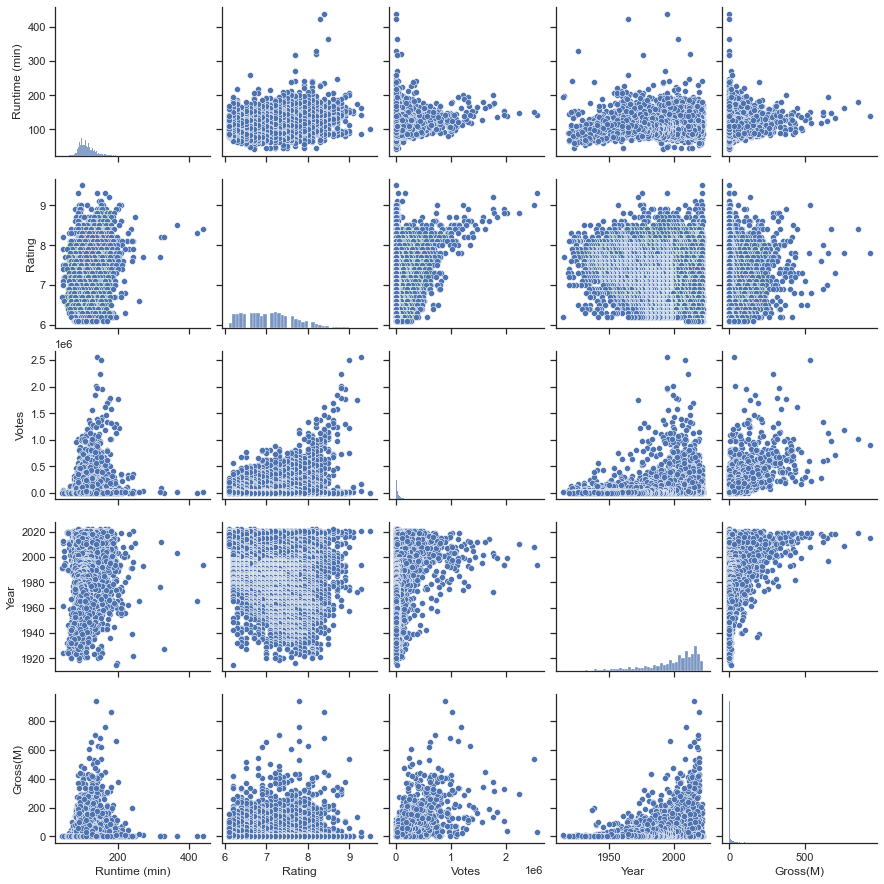

In [153]:
sns.pairplot(MovieDataFrame)

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



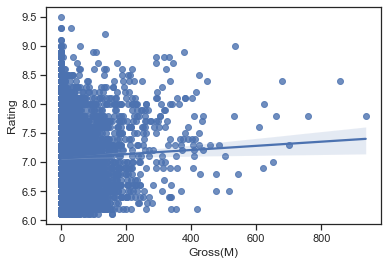

In [155]:
##Regresion between rating and gross

sns.regplot(MovieDataFrame['Gross(M)'],MovieDataFrame['Rating']);

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



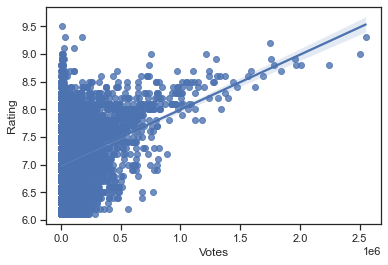

In [158]:
##Regresion between rating and Votes

sns.regplot(MovieDataFrame['Votes'],MovieDataFrame['Rating']);

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



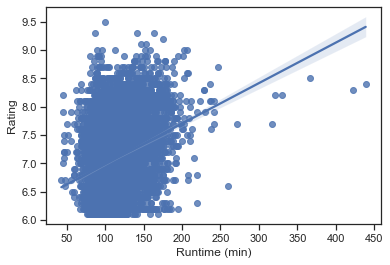

In [262]:
##Regresion between rating and Runtime

sns.regplot(MovieDataFrame['Runtime (min)'],MovieDataFrame['Rating']);

#### Director

In [160]:
MovieDataFrame.columns

Index(['Moviename', 'Runtime (min)', 'Genre', 'Rating', 'MPAA_Rating',
       'Director', 'Actors', 'Votes', 'Year', 'Gross(M)', 'Updated Genre'],
      dtype='object')

In [192]:
Director=MovieDataFrame.groupby('Director', as_index =False)\
.agg({'Gross(M)':'sum','Moviename':'count','Rating':'mean'})\
.rename(columns={'Gross(M)':'TotalGross(Million)', 'Moviename':'count'})\
.sort_values(by ='TotalGross(Million)', ascending= False).head(15)
Director['Rating']= round(Director['Rating'],2)

In [193]:
Director

,Director,TotalGross(Million),count,Rating
3697,Steven Spielberg,4155.20,30,7.50
281,Anthony Russo,2205.37,6,7.55
1581,J.J. Abrams,2199.40,6,7.30
3018,Peter Jackson,2134.38,13,7.56
3309,Robert Zemeckis,2086.70,18,7.22
686,Christopher Nolan,2063.32,11,8.16
3349,Ron Howard,2030.56,23,6.92
1624,James Cameron,1948.98,7,7.87
713,Clint Eastwood,1824.62,34,7.13
898,David Yates,1791.19,7,7.27


In [183]:
data=go.Bar(y=Director['TotalGross(Million)'],x=Director['Director'],text=Director['TotalGross(Million)'], textposition='outside')
layout= go.Layout(title='Top 15 Directors with Highest Gross Total ', xaxis= {'title':'Director'}, yaxis= {'title':'TotalGross(Million)'}, autosize=True)
go.Figure(data,layout)

In [191]:
round(Director['Rating'][3349],2)

6.92

In [194]:
data=go.Bar(y=Director['Rating'],x=Director['Director'],text=Director['Rating'], textposition='outside')
layout= go.Layout(title='Average Rating for Top 15 Director with Highest Gross Margin ', xaxis= {'title':'Director'}, yaxis= {'title':'Average Rating'}, autosize=True)
go.Figure(data,layout)

### Analysis : Best Picture Movie Data

###### Top 10 Oscar movie 
- Votes
- Rating
- Gross 
- Runtime

In [195]:
BestPictureDataFrame


,Moviename,Runtime (min),Genre,Rating,MPAA_Rating,Director,Actors,Votes,Year,Gross (M),Updated Genre
0,Nomadland,107,Drama,7.3,R,Chloé Zhao,"Frances McDormand, David Strathairn, Linda May...",145861,2020,0.00,Drama
1,Parasite,132,"Comedy, Drama, Thriller",8.6,R,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Cho, Woo...",720099,2019,53.37,Comedy
2,Green Book,130,"Biography, Comedy, Drama",8.2,PG-13,Peter Farrelly,"Viggo Mortensen, Mahershala Ali, Linda Cardell...",452059,2018,85.08,Biography
3,The Shape of Water,123,"Drama, Fantasy, Romance",7.3,R,Guillermo del Toro,"Sally Hawkins, Octavia Spencer, Michael Shanno...",404394,2017,63.86,Drama
4,Moonlight,111,Drama,7.4,R,Barry Jenkins,"Mahershala Ali, Naomie Harris, Trevante Rhodes...",296487,2016,27.85,Drama
...,...,...,...,...,...,...,...,...,...,...,...
89,Cimarron,123,"Drama, Western",5.9,Passed,Wesley Ruggles,"Richard Dix, Irene Dunne, Estelle Taylor, Nanc...",6026,1931,0.00,Drama
90,All Quiet on the Western Front,152,"Drama, War",8.1,Passed,Lewis Milestone,"Lew Ayres, Louis Wolheim, John Wray, Arnold Lucy",60318,1930,3.27,Drama
91,The Broadway Melody,100,"Drama, Musical, Romance",5.7,Passed,Harry Beaumont,"Bessie Love, Anita Page, Charles King, Eddie Kane",7061,1929,6.12,Drama
92,Wings,144,"Drama, Romance, War",7.5,PG-13,William A. Wellman,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",12546,1927,6.59,Drama


In [207]:
# Top 10 Oscar movie with highest Votes
Vote=BestPictureDataFrame.sort_values(by=['Votes'], ascending=False).head(10)[['Moviename','Votes','Year']].sort_values(by=['Votes'], ascending=True)
Vote

,Moviename,Votes,Year
23,Titanic,1122032,1997
21,American Beauty,1123315,1999
46,The Godfather: Part II,1215829,1974
14,The Departed,1271463,2006
27,Schindler's List,1300932,1993
29,The Silence of the Lambs,1368820,1991
20,Gladiator,1437102,2000
48,The Godfather,1753224,1972
17,The Lord of the Rings: The Return of the King,1756917,2003
26,Forrest Gump,1967003,1994


In [208]:
data=go.Bar(y=Vote['Moviename'], x=Vote['Votes'], text=Vote['Votes'],orientation='h')
layout= go.Layout(title=' Top 10 Oscar Winning Movies with Highest Votes', xaxis= {'title':'Moviename'}, yaxis= {'title':'Votes'},autosize=True)
go.Figure(data,layout)

In [ ]:
###### Top 10 Oscar movie with highest Gross

In [209]:
Gross=BestPictureDataFrame.sort_values(by=['Gross (M)'], ascending=False).head(10)[['Moviename','Gross (M)']].sort_values(by=['Gross (M)'],ascending=True)
Gross

,Moviename,Gross (M)
55,The Sound of Music,163.21
18,Chicago,170.69
19,A Beautiful Mind,170.74
32,Rain Man,178.80
30,Dances with Wolves,184.21
20,Gladiator,187.71
81,Gone with the Wind,198.68
26,Forrest Gump,330.25
17,The Lord of the Rings: The Return of the King,377.85
23,Titanic,659.33


In [213]:
data=go.Bar(x=Gross['Gross (M)'],y=Gross['Moviename'], text=Gross['Gross (M)'],orientation='h')
layout= go.Layout(title=' Top 10 Oscar winning Movies with Highest Gross', xaxis= {'title':'Moviename'}, yaxis= {'title':'Gross (Million)'},autosize=True)
go.Figure(data,layout)

In [211]:
#Top 5 movies with highest Runtime
Rating=BestPictureDataFrame.sort_values(by=['Rating'], ascending=False).head(10)[['Moviename','Rating']].sort_values(by=['Rating'],ascending=True)
Rating



,Moviename,Rating
14,The Departed,8.5
78,Casablanca,8.5
29,The Silence of the Lambs,8.6
1,Parasite,8.6
45,One Flew Over the Cuckoo's Nest,8.7
26,Forrest Gump,8.8
27,Schindler's List,8.9
17,The Lord of the Rings: The Return of the King,8.9
46,The Godfather: Part II,9.0
48,The Godfather,9.2


In [214]:
#plot the Top 10 Movies by Runtime
data=go.Bar(x=Rating['Rating'],y=Rating['Moviename'], text=Rating['Rating'],orientation='h')
layout= go.Layout(title=' Top 10 Oscar winning Movies with Highest Rating', yaxis= {'title':'Moviename'}, xaxis= {'title':'Rating'},autosize=True)
go.Figure(data,layout)

#### Distribution

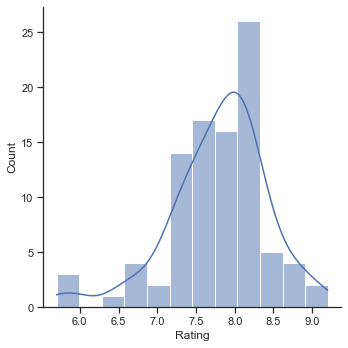

In [221]:
#Distribution across Rating
sns.displot(BestPictureDataFrame['Rating'], kde=True);

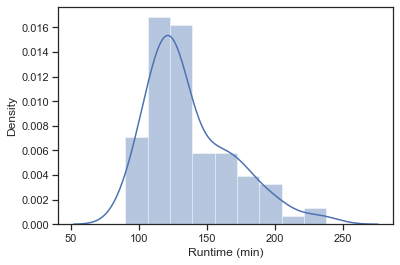

In [219]:
#Distribution across Runtime
sns.displot(BestPictureDataFrame['Runtime (min)'],kde=True);

### Genre

In [226]:
### Genre pie
GenreCount=BestPictureDataFrame.groupby('Updated Genre', as_index =False)\
.agg({'Moviename':'count'})\
.rename(columns={'Moviename':'count'})\
.sort_values(by ='count', ascending= False)
GenreCount



,Updated Genre,count
5,Drama,45
2,Biography,17
3,Comedy,13
4,Crime,9
1,Adventure,7
0,Action,3


In [227]:
data=go.Pie(labels=GenreCount['Updated Genre'], values=GenreCount['count'])
layout= go.Layout(title=' Genre Distribution', autosize=True)
go.Figure(data,layout)

In [254]:
#Director with higest number of award for best picture

DirectorBestMovie=BestPictureDataFrame.groupby('Director', as_index =False)\
.agg({'Gross (M)':'sum','Moviename':'count','Rating':'mean'})\
.rename(columns={'Gross (M)':'TotalGross(Million)', 'Moviename':'count'})\
.sort_values(by ='count', ascending= False).head(11)
DirectorBestMovie['Rating']= round(DirectorBestMovie['Rating'],2)
DirectorBestMovie

,Director,TotalGross(Million),count,Rating
80,William Wyler,111.85,3,7.93
22,Frank Capra,9.02,2,8.00
51,Milos Forman,163.97,2,8.50
25,Fred Zinnemann,58.85,2,7.65
23,Frank Lloyd,7.63,2,6.80
21,Francis Ford Coppola,192.27,2,9.10
18,Elia Kazan,9.60,2,7.65
15,David Lean,89.73,2,8.20
13,Clint Eastwood,201.65,2,8.15
75,Vincente Minnelli,4.50,2,6.95


In [255]:
data=go.Bar(y=DirectorBestMovie['count'],x=DirectorBestMovie['Director'],text=DirectorBestMovie['count'], textposition='outside')
layout= go.Layout(title='Director with Maximum Awards for Best Picture ', xaxis= {'title':'Director'}, yaxis= {'title':'Count'}, autosize=True)
go.Figure(data,layout)

In [256]:
data=go.Bar(y=DirectorBestMovie['Rating'],x=DirectorBestMovie['Director'],text=DirectorBestMovie['Rating'], textposition='outside')
layout= go.Layout(title='Average Rating ', xaxis= {'title':'Director'}, yaxis= {'title':'Count'}, autosize=True)
go.Figure(data,layout)

## CONCLUSION

- Drama : Maximum Oscar Awards for Best Picture
- Action: Highest money-making Genre
- Titanic: Highest Gross (Oscar movies)


## NEXT STEPS:

- Web scrape https://www.boxofficemojo.com/
- Work with IMDB Dataset 
- Further Data Analysis 
- Build predictive models to predict Ratings and Gross Collections
